

---



# Part 0:  Imports and Data Preparation


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("/content/assignment4.1a.csv")



---



In [36]:
df.head()

,Date,StoreCode,ProductCode,SalesQuantity
0,2015-01-01,8,9,-1
1,2015-01-01,131,9,1
2,2015-01-01,144,9,2
3,2015-01-01,203,9,2
4,2015-01-01,256,9,0


In [37]:
len(df['ProductCode'].unique())

317

In [38]:
df['ProductCode'].unique()

array([  9,   6,   3,   2,   5,   4,   1,  12,  20,   8,  11,  22,  16,
        45,   7,  10,  35,  19,  29,  13,  18,  32,  14,  23,  21,  15,
        42,  36,  49,  50,  33,  17,  27,  41,  24,  28,  47,  37,  30,
        43,  25,  58,  56,  44,  38,  51,  26,  64,  67,  68,  62,  77,
        73,  57,  65,  72,  80,  53,  31,  79,  46,  81,  60,  74,  96,
        75,  34,  39,  61,  66,  86,  76,  48,  70, 112,  90,  84,  94,
       113,  83, 105, 121, 123,  52,  78,  55,  59,  40, 132, 144,  69,
        85, 103,  88,  98, 116,  71,  93, 101, 122, 165, 172, 130,  54,
        82, 109,  91, 104, 118,  87,  95, 125, 126, 182, 186,  89, 157,
       110,  99,  97, 106,  63, 128, 108,  92, 136, 102, 111, 193, 140,
       198, 166, 119, 107, 114, 117, 100, 127, 120, 146, 129, 124, 231,
       134, 246, 154, 115, 137, 133, 141, 282, 138, 153, 289, 135, 301,
       139, 131, 142, 152, 158, 147, 149, 174, 306, 169, 180, 168, 143,
       171, 170, 145, 187, 310, 314, 183, 189, 317, 159, 188, 14

In [39]:
len(df['StoreCode'].unique())

340

In [40]:
df['StoreCode'].unique()

array([  8, 131, 144, 203, 256, 273,  12,  52,  65, 118, 173, 177, 184,
       250, 304, 331,  62, 148, 245,  20,  44,  86,  98, 125, 137, 221,
       233, 269, 293, 308, 339,   1,   5,   7,  37,  94, 167, 181, 186,
       199, 260, 276, 280, 307,   6,  14, 100, 113, 277, 288,  18,  46,
        50,  95, 117, 136, 139, 143, 188, 196, 330,   9,  39,  90, 106,
       108, 192, 194, 198, 249, 278, 279, 290, 312, 321,  23,  36,  56,
       147, 190, 323,  28,  60, 282,  42,  43,  68,  70, 191, 314, 315,
        55,  84,  99, 132, 170, 219, 247, 258, 274, 340,  48,  89, 138,
       213, 248, 272, 325, 333,  24,  82, 119, 262, 172, 211, 218, 268,
       283, 292,  35,  78,  13, 301,   3, 134, 214,  87, 201, 210, 254,
       259, 264, 267, 311, 319,  32,  51,  88, 110, 146, 228, 296, 337,
       239, 302,  91, 215, 271,  81, 114, 135, 141, 165, 316, 116, 178,
       295,  19, 252, 261, 332, 162, 208, 240, 255, 294, 309,  25,  83,
       150, 234, 180, 270, 324, 112, 305, 310, 109, 226, 238, 19

In [41]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873618 entries, 0 to 1873617
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Date           object
 1   StoreCode      int64 
 2   ProductCode    int64 
 3   SalesQuantity  int64 
dtypes: int64(3), object(1)
memory usage: 57.2+ MB


In [42]:
# Check missing values
df.isnull().sum()

Date             0
StoreCode        0
ProductCode      0
SalesQuantity    0
dtype: int64



---



In [45]:
df=df[df['ProductCode']==218]
df

,Date,StoreCode,ProductCode,SalesQuantity
1269574,2015-01-01,2,218,12
1269575,2015-01-01,3,218,1
1269576,2015-01-01,4,218,5
1269577,2015-01-01,6,218,3
1269578,2015-01-01,7,218,24
...,...,...,...,...
1483717,2015-07-31,329,218,1
1483718,2015-07-31,331,218,12
1483719,2015-07-31,333,218,2
1483720,2015-07-31,336,218,2


In [46]:
df = df.groupby(['Date', 'ProductCode'])['SalesQuantity'].sum().reset_index()

In [47]:
df

,Date,ProductCode,SalesQuantity
0,2015-01-01,218,746
1,2015-01-02,218,1632
2,2015-01-03,218,1591
3,2015-01-04,218,1969
4,2015-01-05,218,1673
...,...,...,...
207,2015-07-27,218,1163
208,2015-07-28,218,1156
209,2015-07-29,218,948
210,2015-07-30,218,1241


In [48]:
# Change date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [49]:
# Calculate the number of weeks
from datetime import date
import math
d1 = date(2015,1,1)
d2 = date(2015,8,1)
number_of_weeks = math.ceil((d2-d1).days/7)
number_of_weeks

31

In [50]:
# Define the promotion periods
promotion_periods = [
    ('2015-02-10', '2015-02-17'),
    ('2015-03-15', '2015-03-22'),
    ('2015-05-24', '2015-06-01'),
    ('2015-06-21', '2015-06-28'),
    ('2015-09-01', '2015-09-06'),
    ('2015-11-20', '2015-11-27')
]

In [51]:
# Add a new IsPromotion column and initialize to False
df['IsPromotion'] = 0

In [52]:
# Check the date if it is in a promotion period
for start, end in promotion_periods:
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    df.loc[mask, 'IsPromotion'] = 1

In [54]:
df

,Date,ProductCode,SalesQuantity,IsPromotion
0,2015-01-01,218,746,0
1,2015-01-02,218,1632,0
2,2015-01-03,218,1591,0
3,2015-01-04,218,1969,0
4,2015-01-05,218,1673,0
...,...,...,...,...
207,2015-07-27,218,1163,0
208,2015-07-28,218,1156,0
209,2015-07-29,218,948,0
210,2015-07-30,218,1241,0


In [55]:
df.drop('ProductCode', axis=1, inplace=True)

In [56]:
df.drop('IsPromotion', axis=1, inplace=True)

In [15]:
# Determine the sales during non-promotion periods
non_promotion_sales = df[df['IsPromotion'] == 0]

In [16]:
# Determine the sales during promotion periods
promotion_sales = df[df['IsPromotion'] == 1]

In [57]:
# Dealing with missing dates for each store-item combination
all_dates = pd.date_range(start='2015-01-01', end='2015-08-01')

# All possible store-item-date combinations
all_combinations = pd.MultiIndex.from_product([df['ProductCode'].unique(), df['StoreCode'].unique(), all_dates], names=['ProductCode', 'StoreCode', 'Date'])
complete_df = pd.DataFrame(index=all_combinations).reset_index()

KeyError: 'ProductCode'

In [18]:
complete_df.sample(5)

,ProductCode,StoreCode,Date
21641699,280,320,2015-02-17
15012506,179,48,2015-02-23
20663494,250,119,2015-06-01
2313495,17,235,2015-04-13
2554225,28,55,2015-05-23


In [20]:
# Merge with non-promotion sales data
complete_sales = complete_df.merge(df, on=['ProductCode', 'StoreCode', 'Date'], how='left')

# Assume that if a store-item combination has no observation in a certain day, there is no sales for that item at that store at that day.
# Fill missing values with 0
complete_sales['SalesQuantity'].fillna(0, inplace=True)

# Drop IsPromotion column since whole data contains non-promotion sales
complete_sales.drop('IsPromotion', axis=1, inplace=True)



In [58]:
# Return ISO week number, add to the dataframe
df['Time'] = np.arange(len(df.index))

In [59]:
df

,Date,SalesQuantity,Time
0,2015-01-01,746,0
1,2015-01-02,1632,1
2,2015-01-03,1591,2
3,2015-01-04,1969,3
4,2015-01-05,1673,4
...,...,...,...
207,2015-07-27,1163,207
208,2015-07-28,1156,208
209,2015-07-29,948,209
210,2015-07-30,1241,210


In [33]:
product_sales = complete_sales[complete_sales['ProductCode'] == 218]
product_sales

,ProductCode,StoreCode,Date,SalesQuantity,Time
16004820,218,8,2015-01-01,0.0,16004820
16004821,218,8,2015-01-02,12.0,16004821
16004822,218,8,2015-01-03,0.0,16004822
16004823,218,8,2015-01-04,0.0,16004823
16004824,218,8,2015-01-05,0.0,16004824
...,...,...,...,...,...
16077235,218,169,2015-07-28,0.0,16077235
16077236,218,169,2015-07-29,0.0,16077236
16077237,218,169,2015-07-30,0.0,16077237
16077238,218,169,2015-07-31,0.0,16077238


In [67]:
df

,Date,SalesQuantity,Time
0,2015-01-01,746,0
1,2015-01-02,1632,1
2,2015-01-03,1591,2
3,2015-01-04,1969,3
4,2015-01-05,1673,4
...,...,...,...
207,2015-07-27,1163,207
208,2015-07-28,1156,208
209,2015-07-29,948,209
210,2015-07-30,1241,210


In [69]:
dff = df.set_index("Date").to_period()

In [71]:
dff.drop('Time', axis=1, inplace=True)

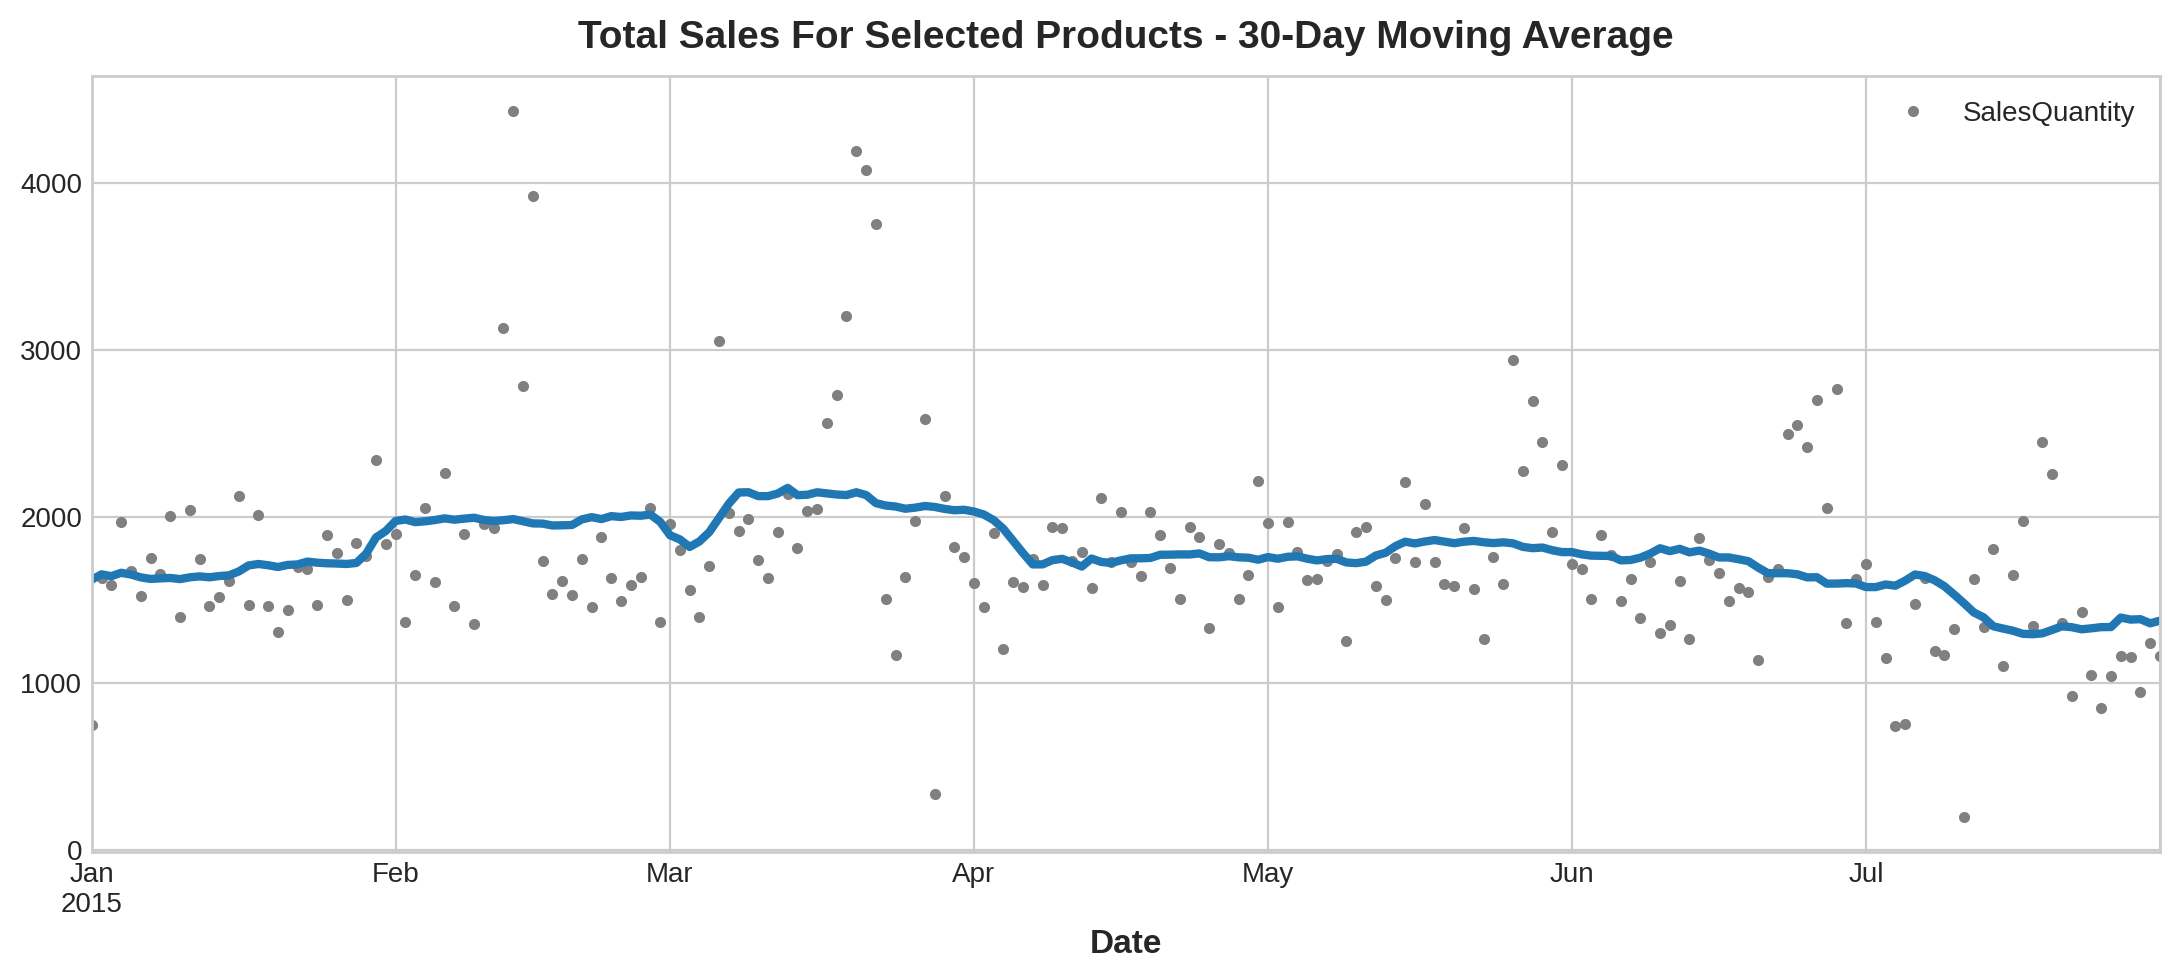

In [72]:

moving_average = dff.rolling(
    window=30,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=15,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = dff.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Total Sales For Selected Products - 30-Day Moving Average", legend=False,
);

In [78]:
dff['Lag_1'] = dff['SalesQuantity'].shift(1)


In [79]:
dff

,SalesQuantity,Lag_1
Date,,
2015-01-01,746,NaN
2015-01-02,1632,746.0
2015-01-03,1591,1632.0
2015-01-04,1969,1591.0
2015-01-05,1673,1969.0
...,...,...
2015-07-27,1163,1044.0
2015-07-28,1156,1163.0
2015-07-29,948,1156.0


In [80]:
from sklearn.linear_model import LinearRegression

X = dff.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = dff.loc[:, 'SalesQuantity']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

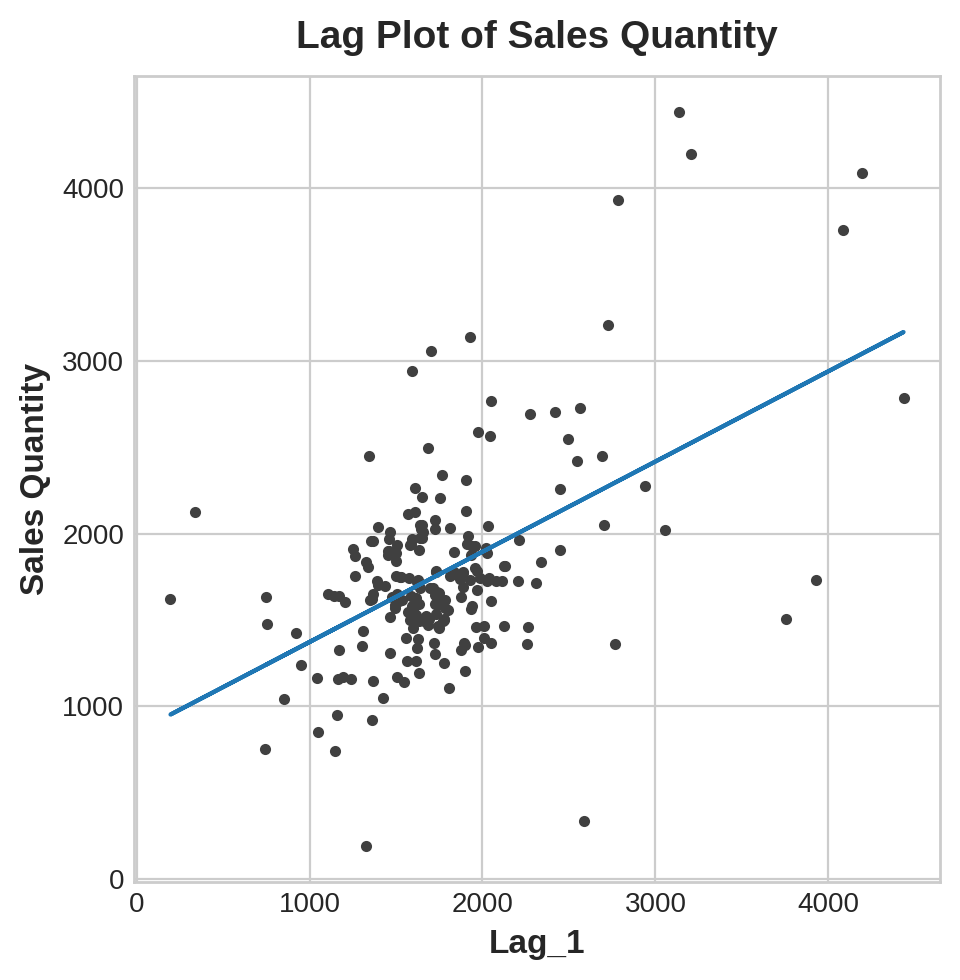

In [83]:

fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Sales Quantity')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Sales Quantity');

In [84]:
dff['Lag_2'] = dff['SalesQuantity'].shift(2)


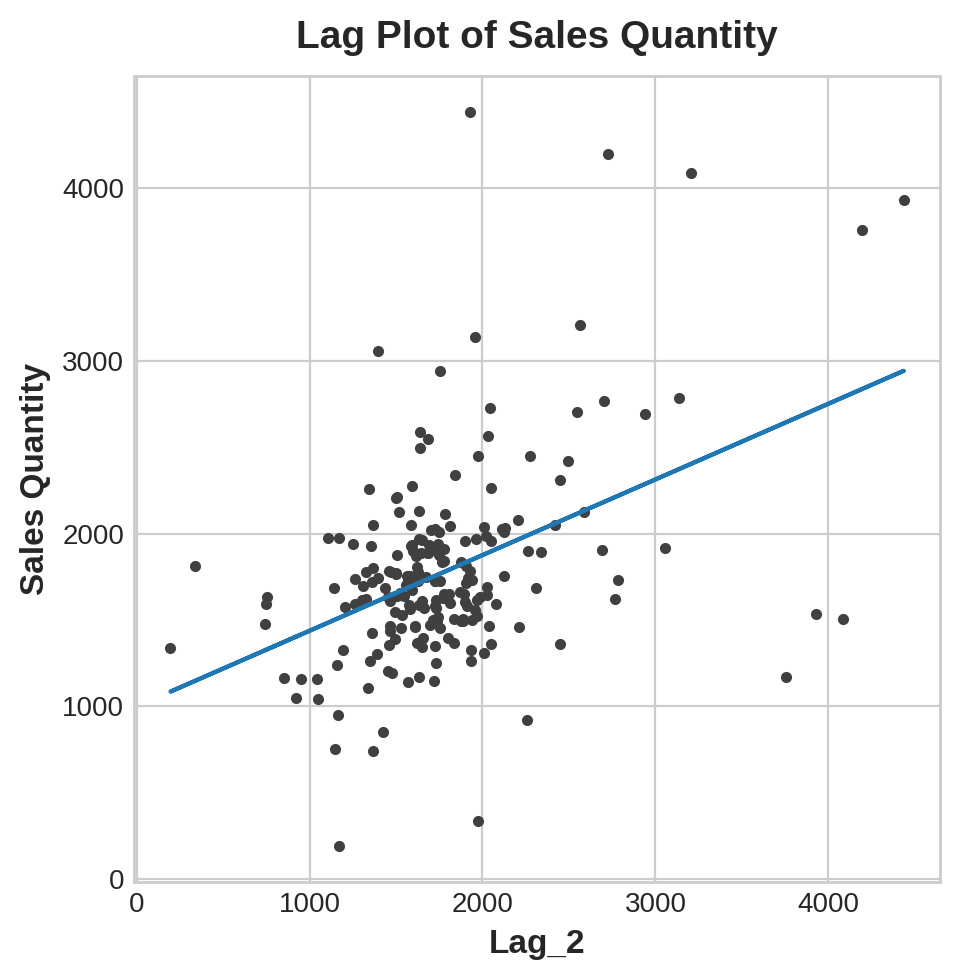

In [85]:
from sklearn.linear_model import LinearRegression

X = dff.loc[:, ['Lag_2']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = dff.loc[:, 'SalesQuantity']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

fig, ax = plt.subplots()
ax.plot(X['Lag_2'], y, '.', color='0.25')
ax.plot(X['Lag_2'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Sales Quantity')
ax.set_xlabel('Lag_2')
ax.set_title('Lag Plot of Sales Quantity');

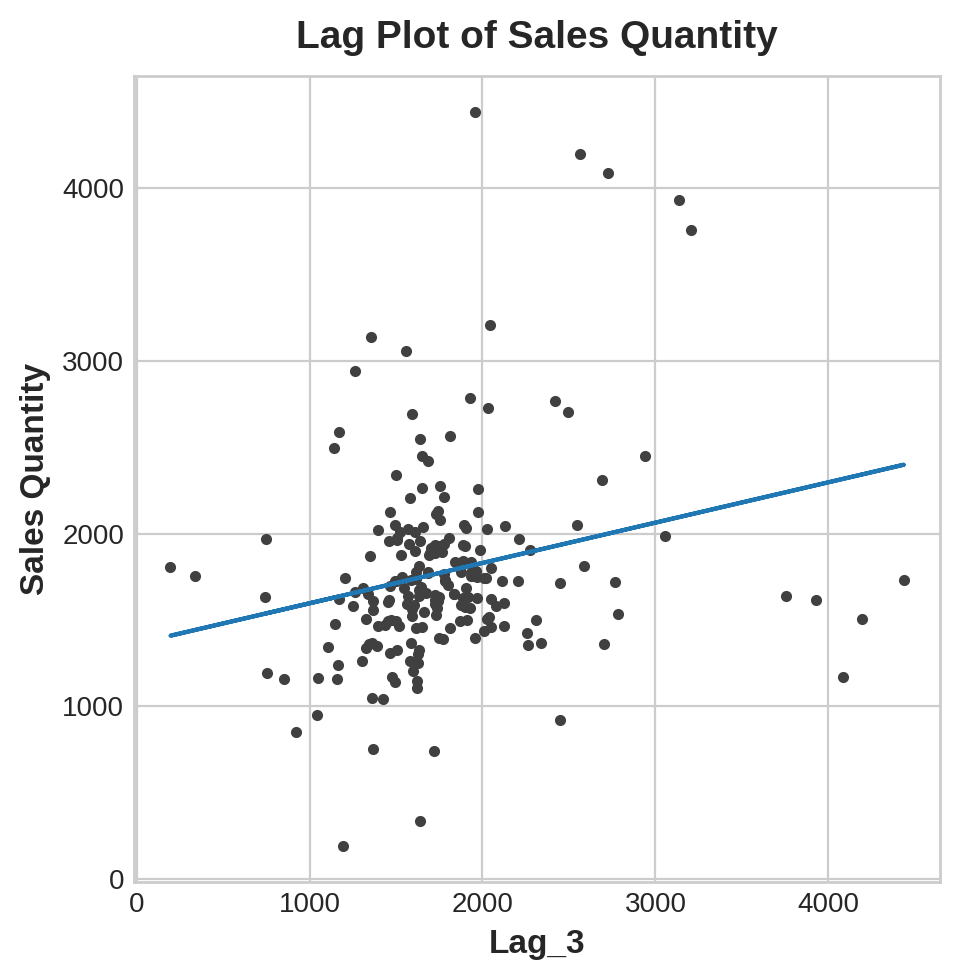

In [86]:
dff['Lag_3'] = dff['SalesQuantity'].shift(3)

X = dff.loc[:, ['Lag_3']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = dff.loc[:, 'SalesQuantity']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

fig, ax = plt.subplots()
ax.plot(X['Lag_3'], y, '.', color='0.25')
ax.plot(X['Lag_3'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Sales Quantity')
ax.set_xlabel('Lag_3')
ax.set_title('Lag Plot of Sales Quantity');

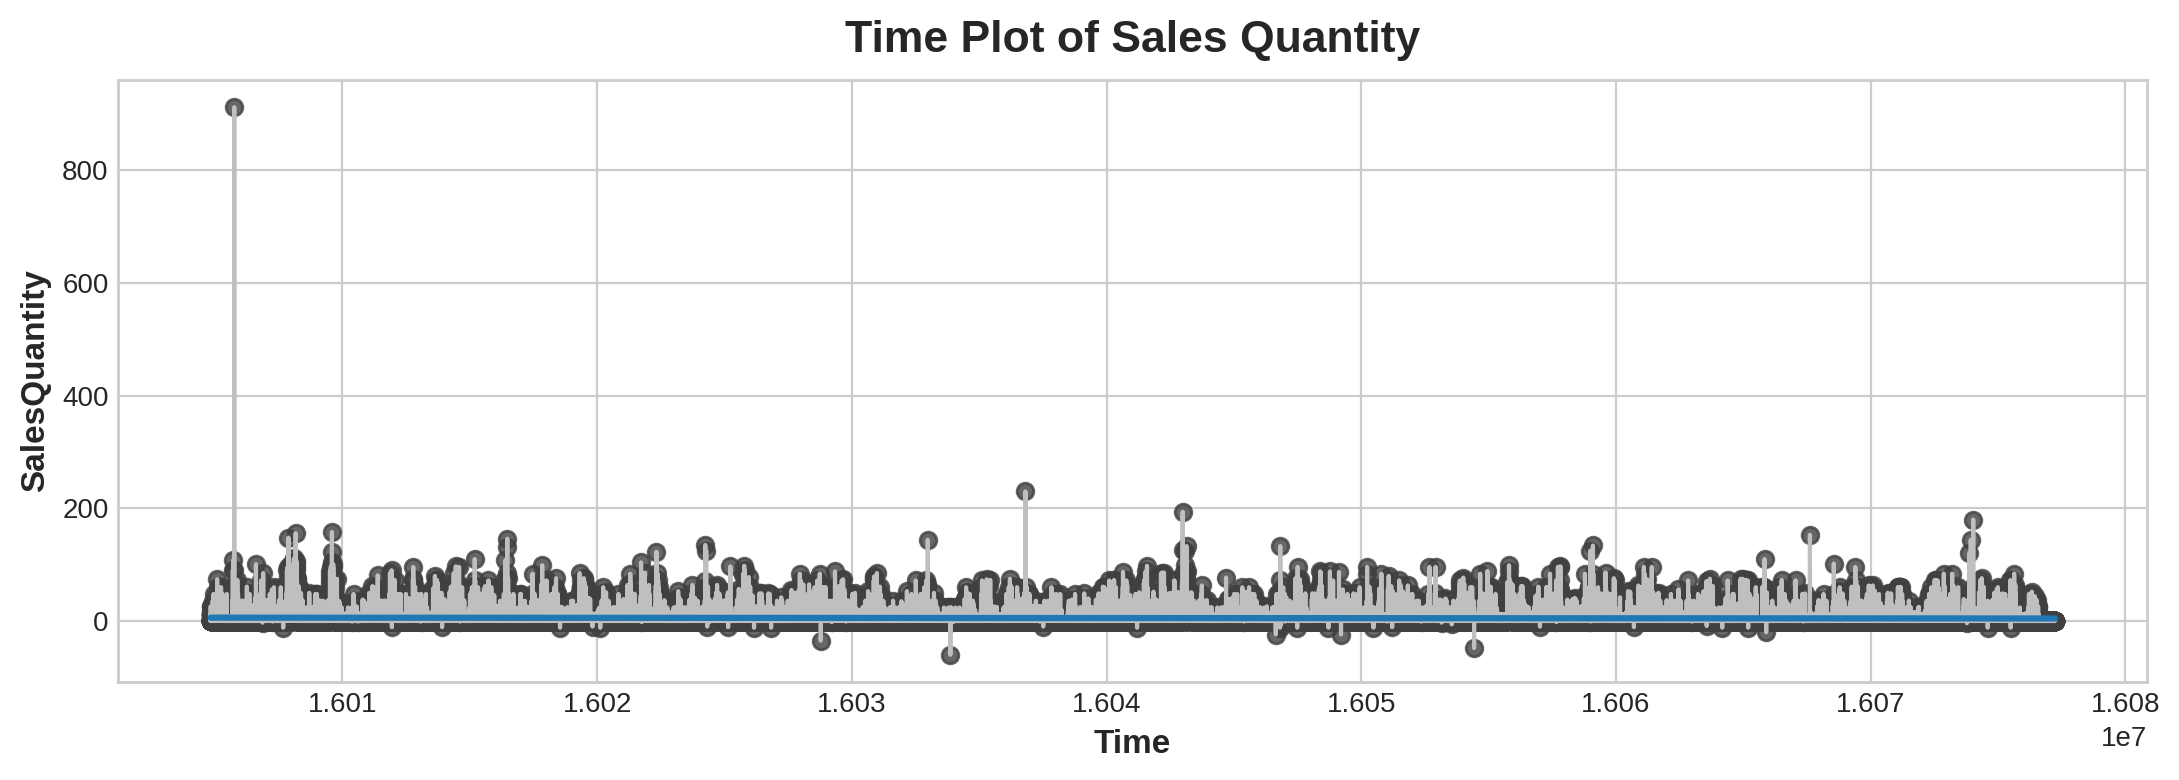

In [30]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

product_sales = complete_sales[complete_sales['ProductCode'] == 218]
fig, ax = plt.subplots()
ax.plot('Time', 'SalesQuantity', data=product_sales, color='0.75')
ax = sns.regplot(x='Time', y='SalesQuantity', data=product_sales, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Sales Quantity');

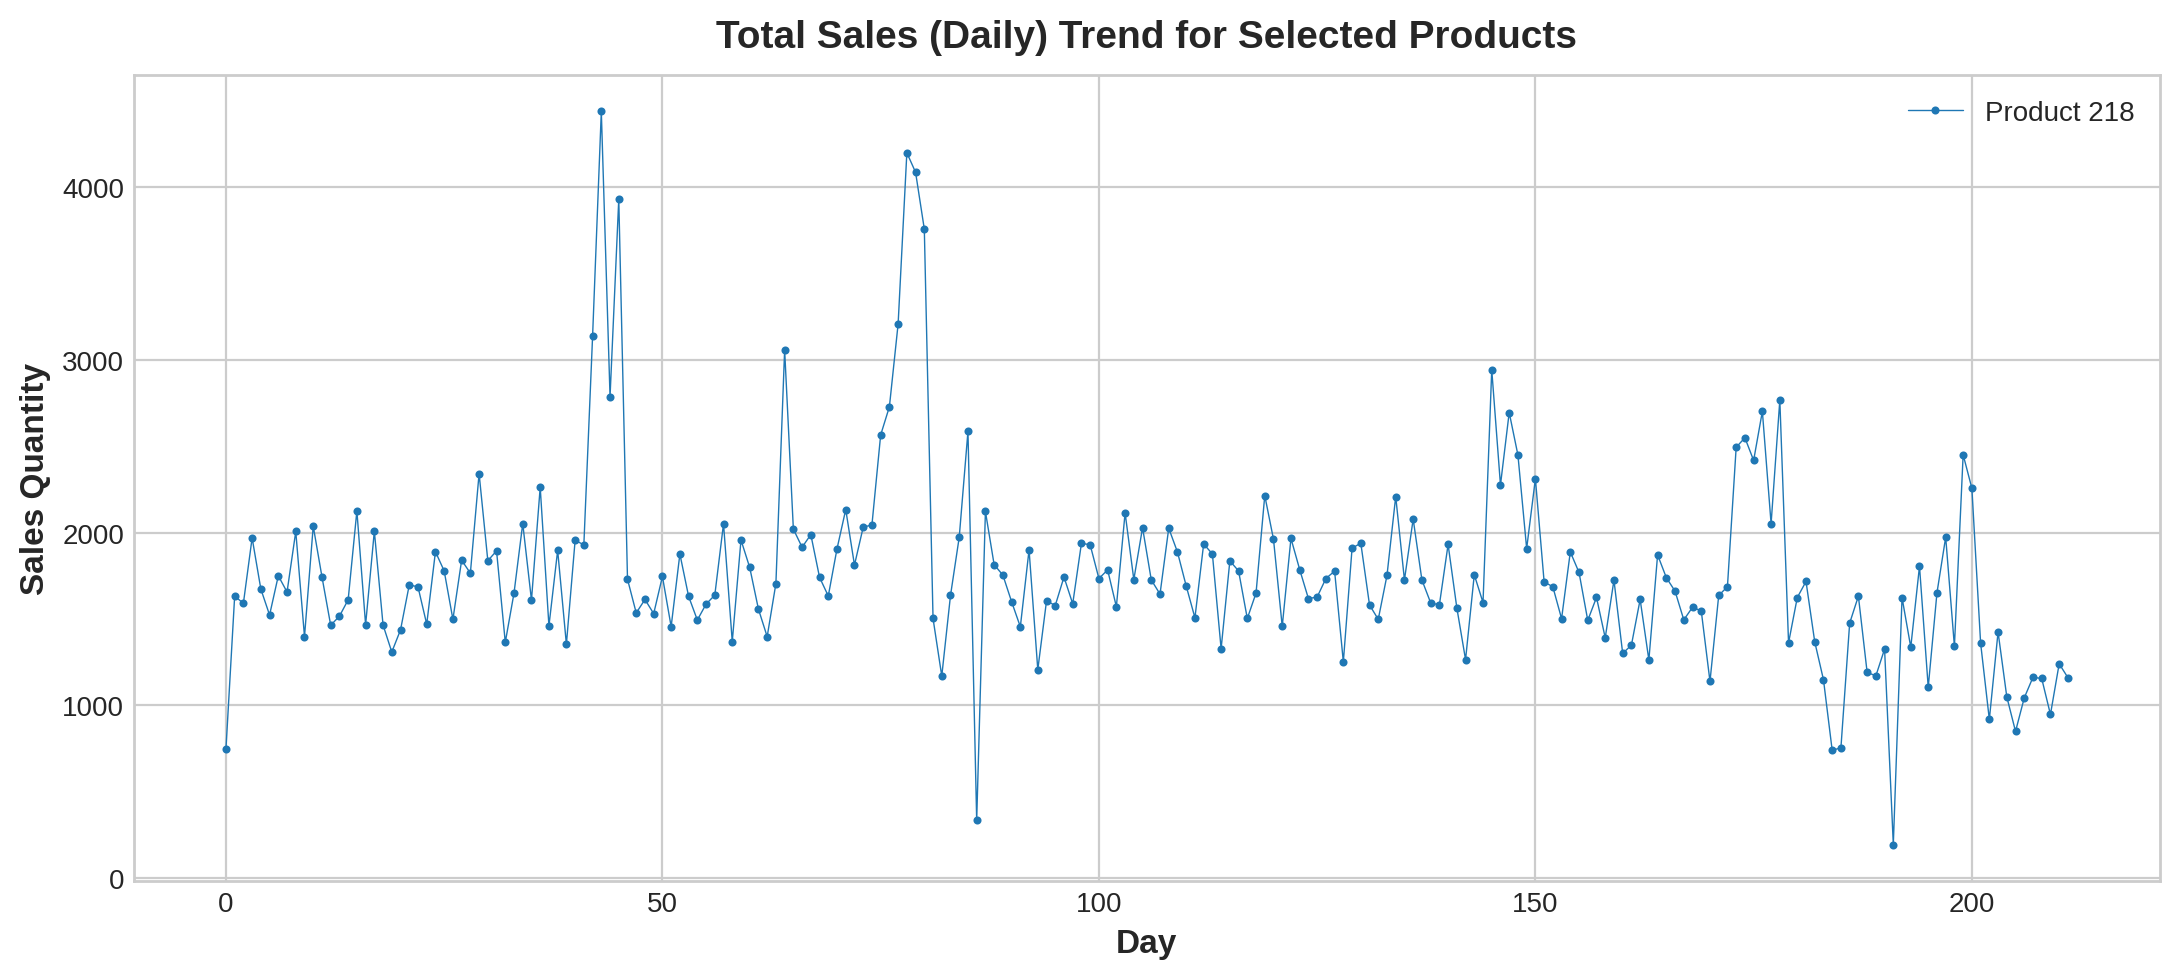

In [65]:
plt.plot(df['Time'], df['SalesQuantity'], label=f'Product 218', linestyle='-',linewidth=0.5, marker='o', markersize=1.9)
plt.title('Total Sales (Daily) Trend for Selected Products')
plt.xlabel('Day')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
complete_non_promotion_sales.head()

,ProductCode,StoreCode,Date,SalesQuantity,Week
0,9,8,2015-01-01,-1.0,1
1,9,8,2015-01-02,0.0,1
2,9,8,2015-01-03,0.0,1
3,9,8,2015-01-04,0.0,1
4,9,8,2015-01-05,0.0,2


In [ ]:
complete_non_promotion_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22957140 entries, 0 to 22957139
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ProductCode    int64         
 1   StoreCode      int64         
 2   Date           datetime64[ns]
 3   SalesQuantity  float64       
 4   Week           UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 810.1 MB


---

# Part 1:  Exploratory Data Analysis


In [ ]:
# Calculate weekly sales per product - store combination
weekly_sales = complete_non_promotion_sales.groupby(['ProductCode', 'StoreCode', 'Week'])['SalesQuantity'].sum().reset_index()

In [ ]:
weekly_sales.head()

,ProductCode,StoreCode,Week,SalesQuantity
0,1,1,1,0.0
1,1,1,2,4.0
2,1,1,3,0.0
3,1,1,4,1.0
4,1,1,5,0.0


In [ ]:
# Calculate average weekly sales per product - store combination
average_weekly_sales = weekly_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()

In [ ]:
average_weekly_sales.head()

,ProductCode,StoreCode,SalesQuantity
0,1,1,0.645161
1,1,2,1.258065
2,1,3,1.193548
3,1,4,0.387097
4,1,5,0.580645


---

In [ ]:
# Merge with sales data
complete_sales = complete_df.merge(df, on=['ProductCode', 'StoreCode', 'Date'], how='left')

# Assume that if a store-item combination has no observation in a certain day, there is no sales for that item at that store at that day.
# Fill missing values with 0
complete_sales['SalesQuantity'].fillna(0, inplace=True)

# Drop IsPromotion column
complete_sales.drop('IsPromotion', axis=1, inplace=True)

# Return ISO week number, add to the dataframe
complete_sales['Week'] = complete_sales['Date'].dt.isocalendar().week

In [ ]:
complete_weekly_sales = complete_sales.groupby(['ProductCode', 'StoreCode', 'Week'])['SalesQuantity'].sum().reset_index()

In [ ]:
complete_average_weekly_sales = complete_weekly_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()

In [ ]:
complete_average_weekly_sales_product = complete_average_weekly_sales.groupby('ProductCode')['SalesQuantity'].agg('mean').reset_index()
complete_average_weekly_sales_product_sorted = complete_average_weekly_sales_product.sort_values(by='SalesQuantity', ascending=True)

In [ ]:
complete_weekly_sales_product = complete_weekly_sales.groupby(['ProductCode','Week'])['SalesQuantity'].mean().reset_index()

In [ ]:
colors=['b','c' ,'g' ,'k', 'm']
# Weekly sales trend for selected product
def plot_product_trend(selected_products):
  plt.figure(figsize=(12, 6), dpi=200)
  selected_weekly_sales = complete_weekly_sales_product[complete_weekly_sales_product['ProductCode'].isin(selected_products)]
  i=0
  for product in selected_products:
    c= colors[i]
    i = i+1
    product_sales = complete_weekly_sales_product[complete_weekly_sales_product['ProductCode'] == product]
    plt.plot(product_sales['Week'], product_sales['SalesQuantity'], label=f'Product {product}', color=c, linestyle='-',linewidth=0.5, marker='o', markersize=1.9)
    plt.axhline(complete_average_weekly_sales_product[complete_average_weekly_sales_product['ProductCode']==product].values[0][1], color=c, linewidth=1.5, alpha=0.35)

  plt.title('Weekly Sales Trend for Selected Products')
  plt.xlabel('Week')
  plt.ylabel('Sales Quantity')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

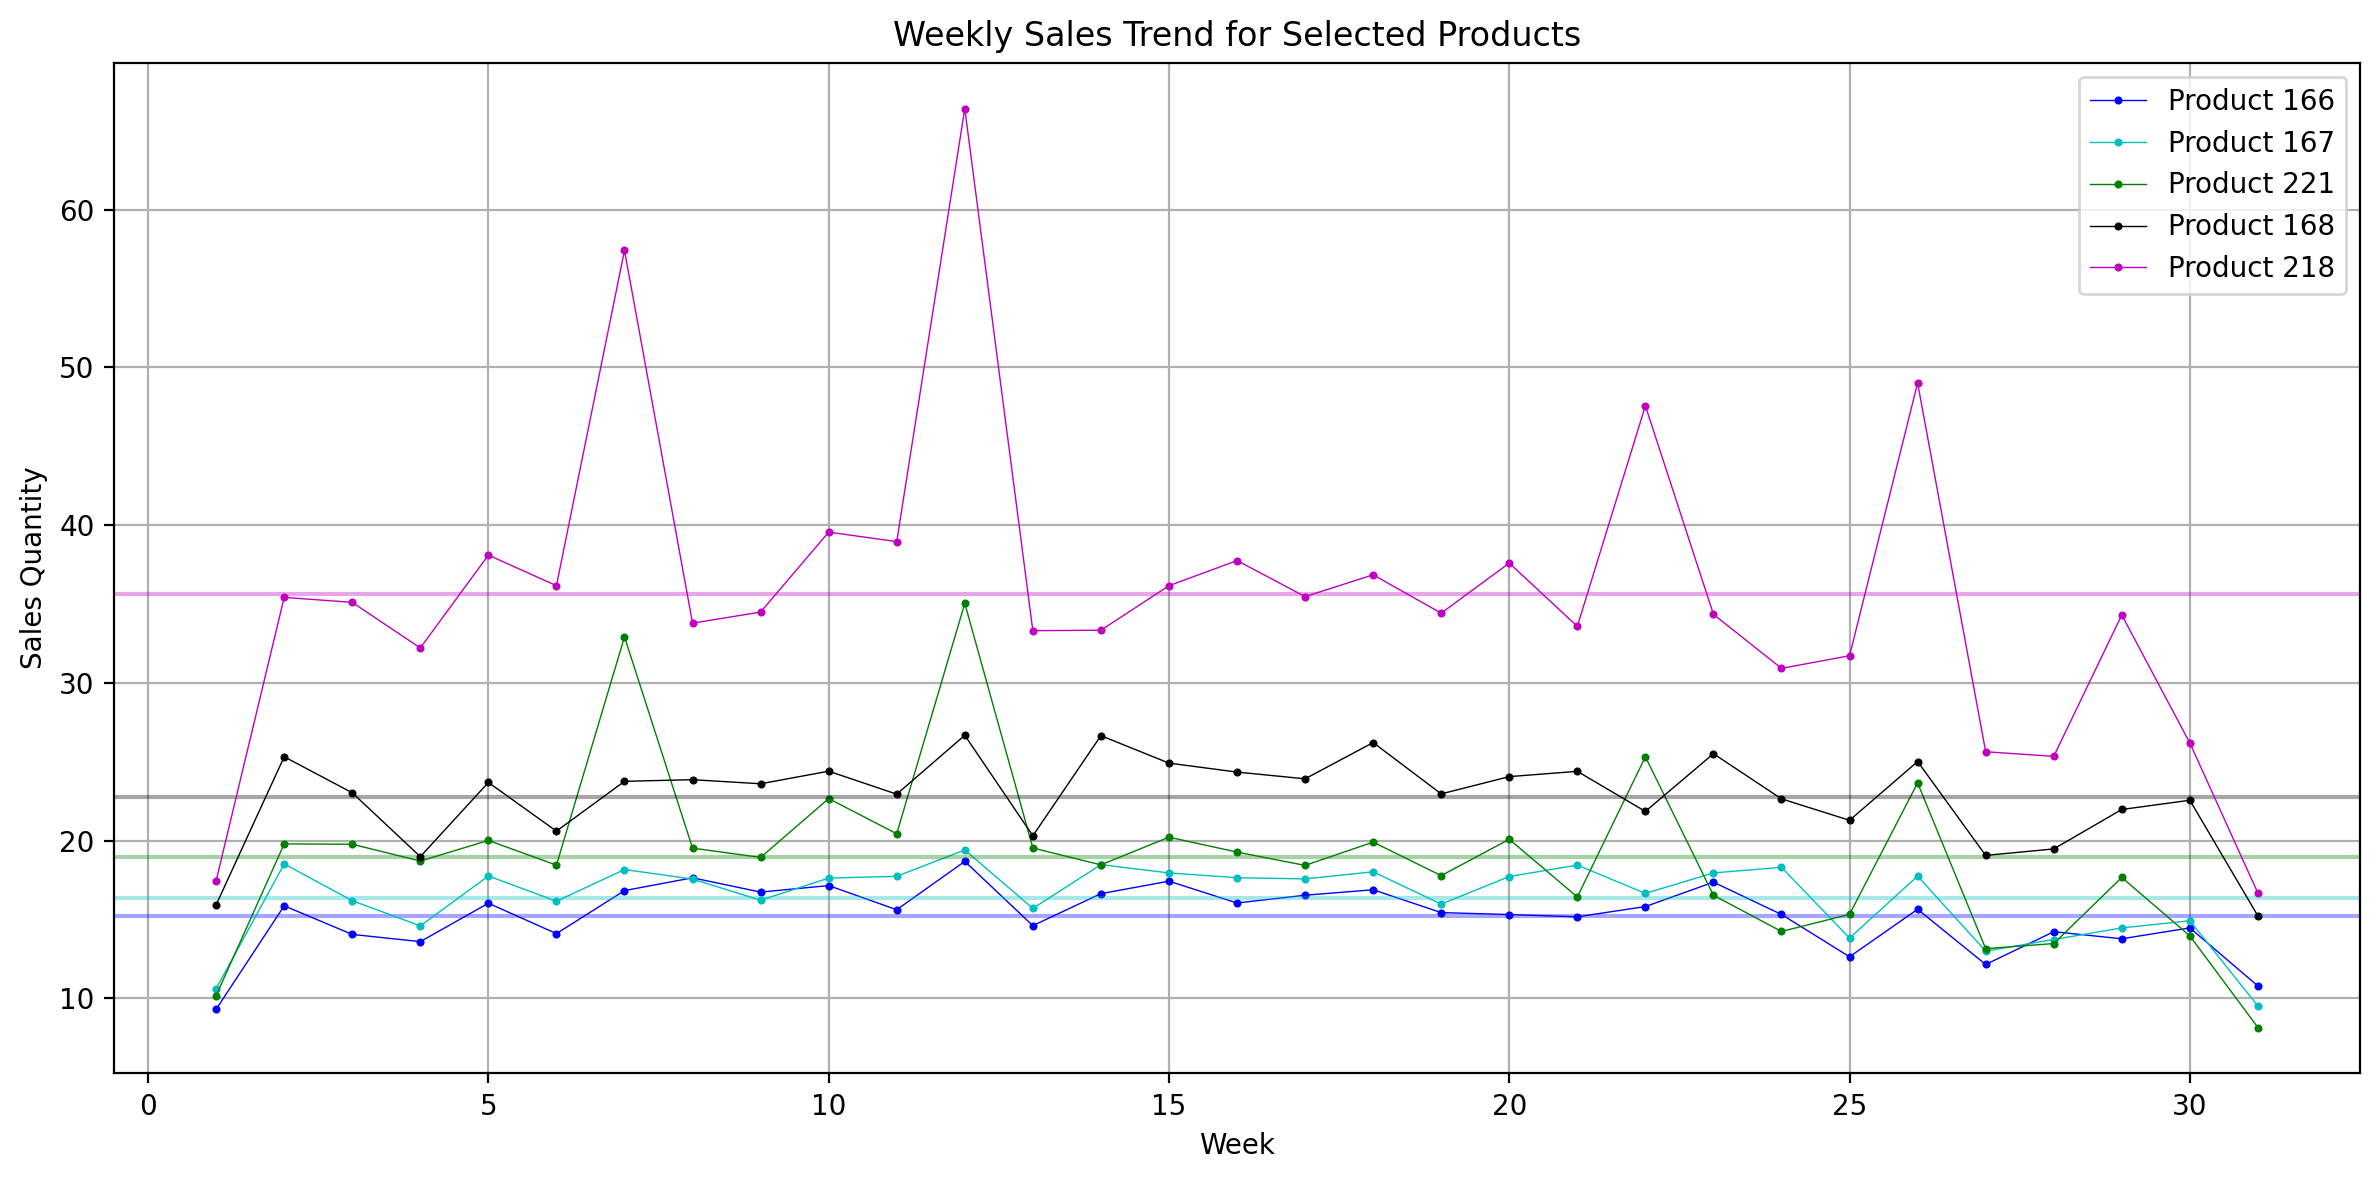

In [ ]:
# Plot weekly sales trend for selected products
plot_product_trend(complete_average_weekly_sales_product_sorted['ProductCode'].tail(5).values)



---



###ProductCode - SalesQuantity

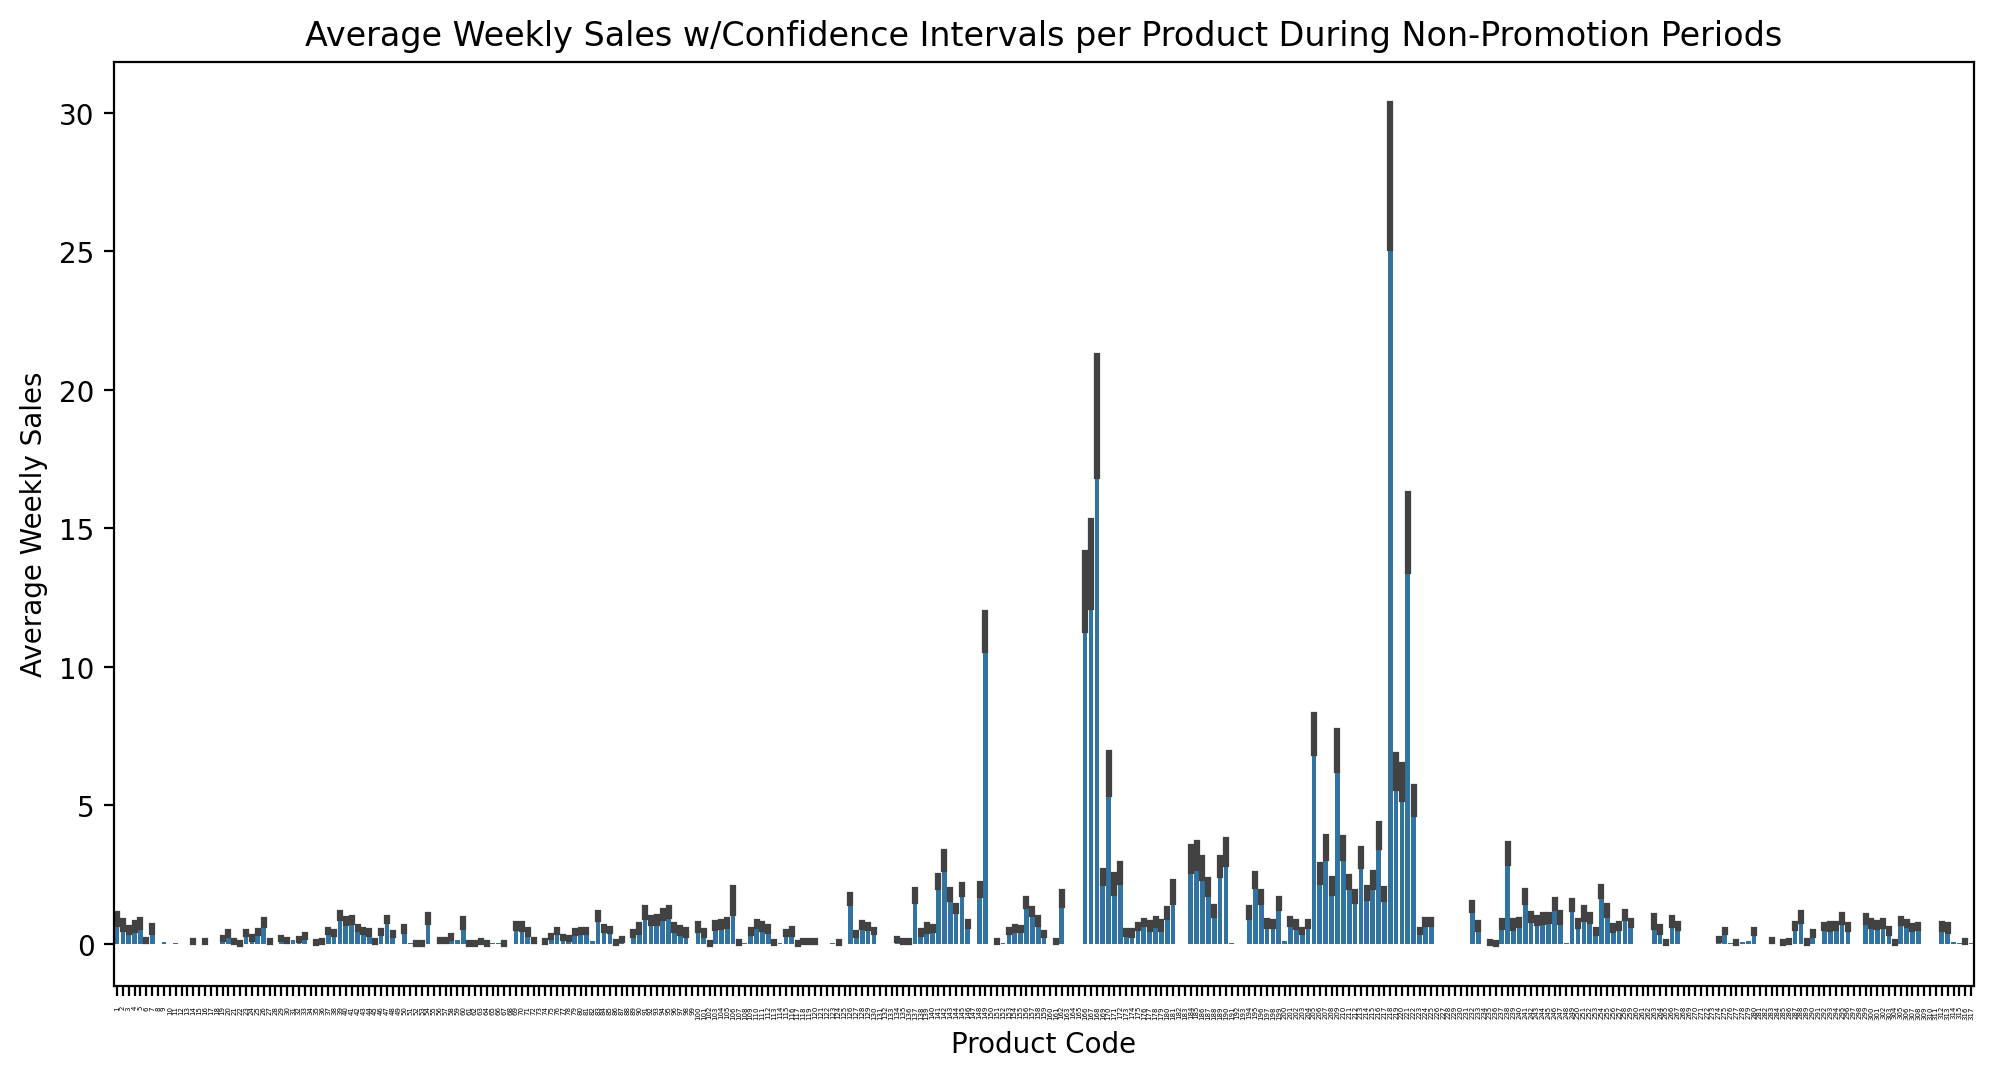

In [ ]:
# Plot the average weekly sales for each product.
plt.figure(figsize=(12,6),dpi=200)
plt.ylabel('Average Weekly Sales')
plt.xlabel('Product Code')
plt.title('Average Weekly Sales w/Confidence Intervals per Product During Non-Promotion Periods')
plt.xticks(fontsize=2.5, rotation=90)
sns.barplot(data=average_weekly_sales,x='ProductCode',y='SalesQuantity', estimator=np.mean, errorbar=("ci",95));



---



In [ ]:
# Sort the products by average weekly sales in ascending order
average_weekly_sales_product = average_weekly_sales.groupby('ProductCode')['SalesQuantity'].agg('mean').reset_index()
average_weekly_sales_product_sorted = average_weekly_sales_product.sort_values(by='SalesQuantity', ascending=True)

In [ ]:
order = average_weekly_sales_product_sorted['ProductCode'].values

In [ ]:
average_weekly_sales_product_sorted.tail(10)

,ProductCode,SalesQuantity
169,170,6.112713
218,219,6.190797
208,209,6.948102
204,205,7.598102
148,149,11.286053
165,166,12.663662
166,167,13.591176
220,221,14.821252
167,168,18.986053
217,218,27.685009


<ipython-input-39-82e7578047a4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_weekly_sales_product_sorted, x='ProductCode',y='SalesQuantity', order=order, palette='viridis');


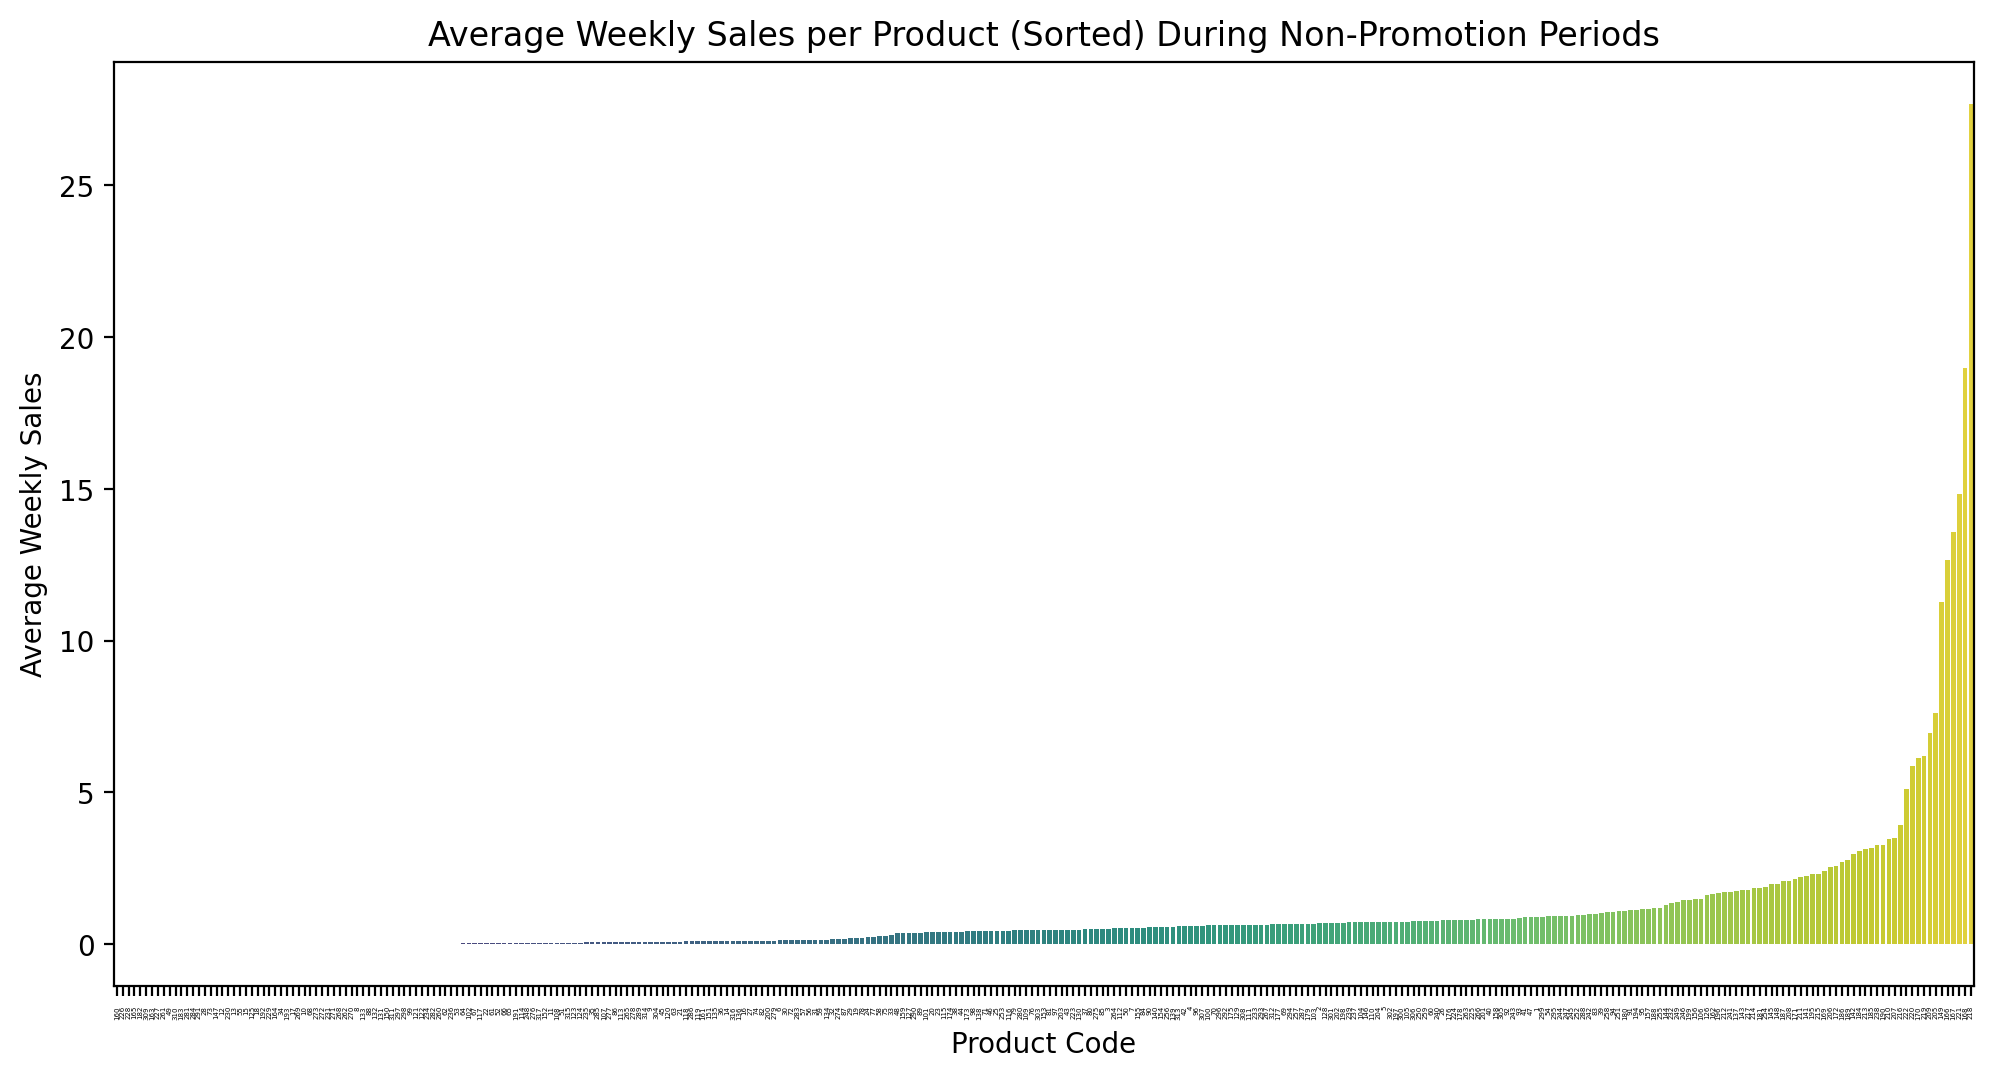

In [ ]:
# Plot the average weekly sales for each product across all stores in ascending order.
plt.figure(figsize=(12,6),dpi=200)
plt.ylabel('Average Weekly Sales')
plt.xlabel('Product Code')
plt.title('Average Weekly Sales per Product (Sorted) During Non-Promotion Periods')
plt.xticks(fontsize=2.5, rotation=90)
sns.barplot(data=average_weekly_sales_product_sorted, x='ProductCode',y='SalesQuantity', order=order, palette='viridis');



---



In [ ]:
# Calculate average weekly sales per product
weekly_sales_product = weekly_sales.groupby(['ProductCode','Week'])['SalesQuantity'].mean().reset_index()

In [ ]:
colors=['b','c' ,'g' ,'k', 'm']
# Weekly sales trend for selected product
def plot_product_trend(selected_products):
  plt.figure(figsize=(12, 6), dpi=200)
  selected_weekly_sales = weekly_sales_product[weekly_sales_product['ProductCode'].isin(selected_products)]
  i=0
  for product in selected_products:
    c= colors[i]
    i = i+1
    product_sales = weekly_sales_product[weekly_sales_product['ProductCode'] == product]
    plt.plot(product_sales['Week'], product_sales['SalesQuantity'], label=f'Product {product}', color=c, linestyle='-',linewidth=0.5, marker='o', markersize=1.9)
    plt.axhline(average_weekly_sales_product[average_weekly_sales_product['ProductCode']==product].values[0][1], color=c, linewidth=1.5, alpha=0.35)

  plt.title('Weekly Sales Trend for Selected Products During Non-Promotion Periods')
  plt.xlabel('Week')
  plt.ylabel('Sales Quantity')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

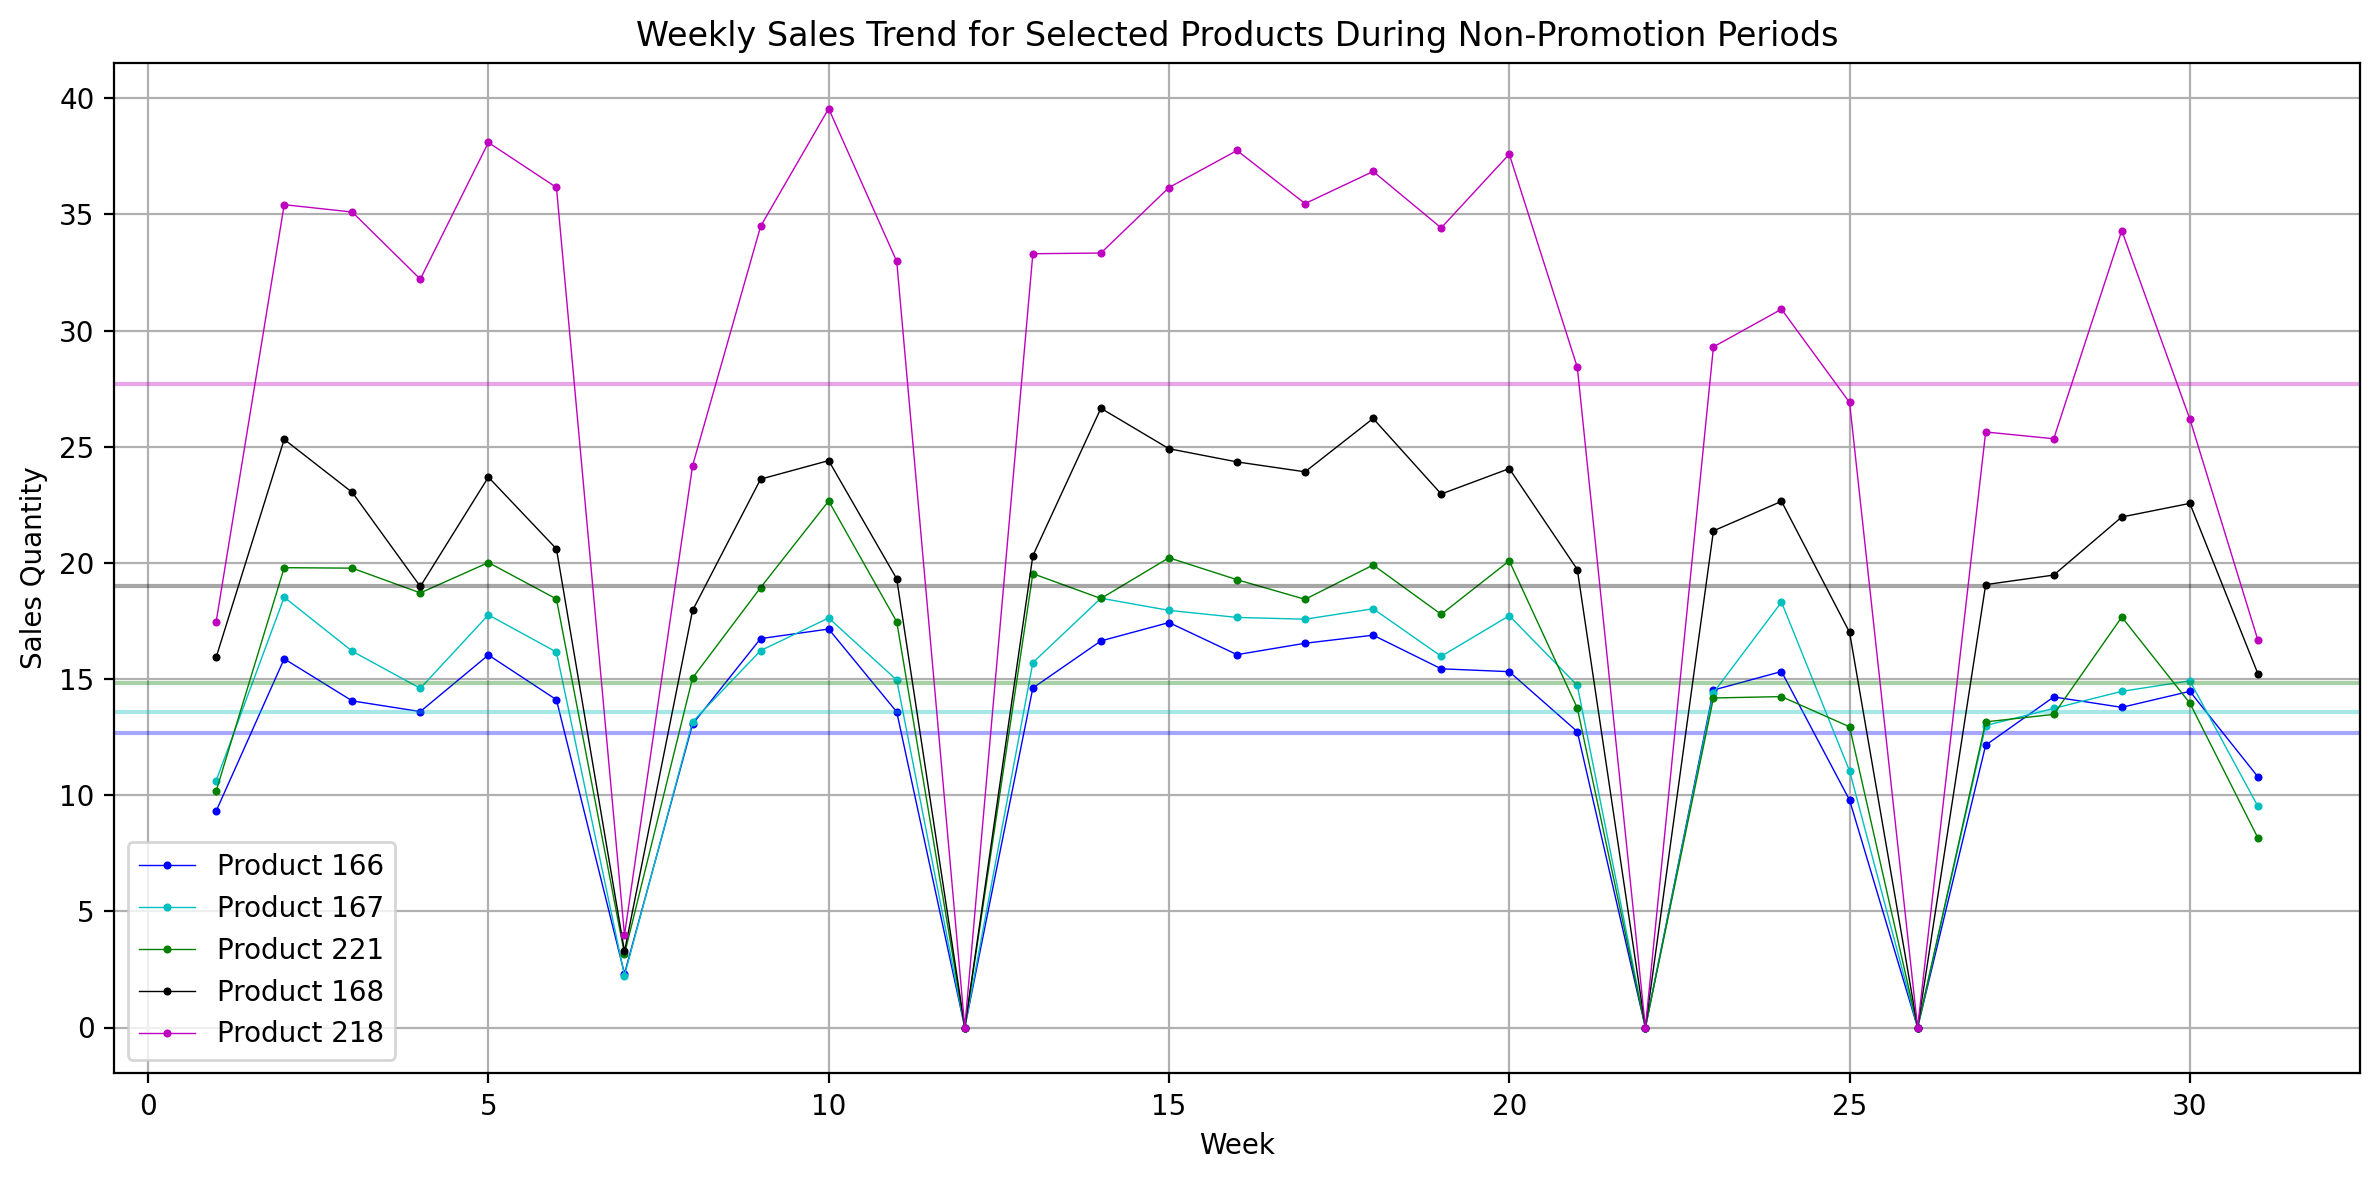

In [ ]:
# Plot weekly sales trend for selected products
plot_product_trend(average_weekly_sales_product_sorted['ProductCode'].tail(5).values)

---

### StoreCode - SalesQuantity

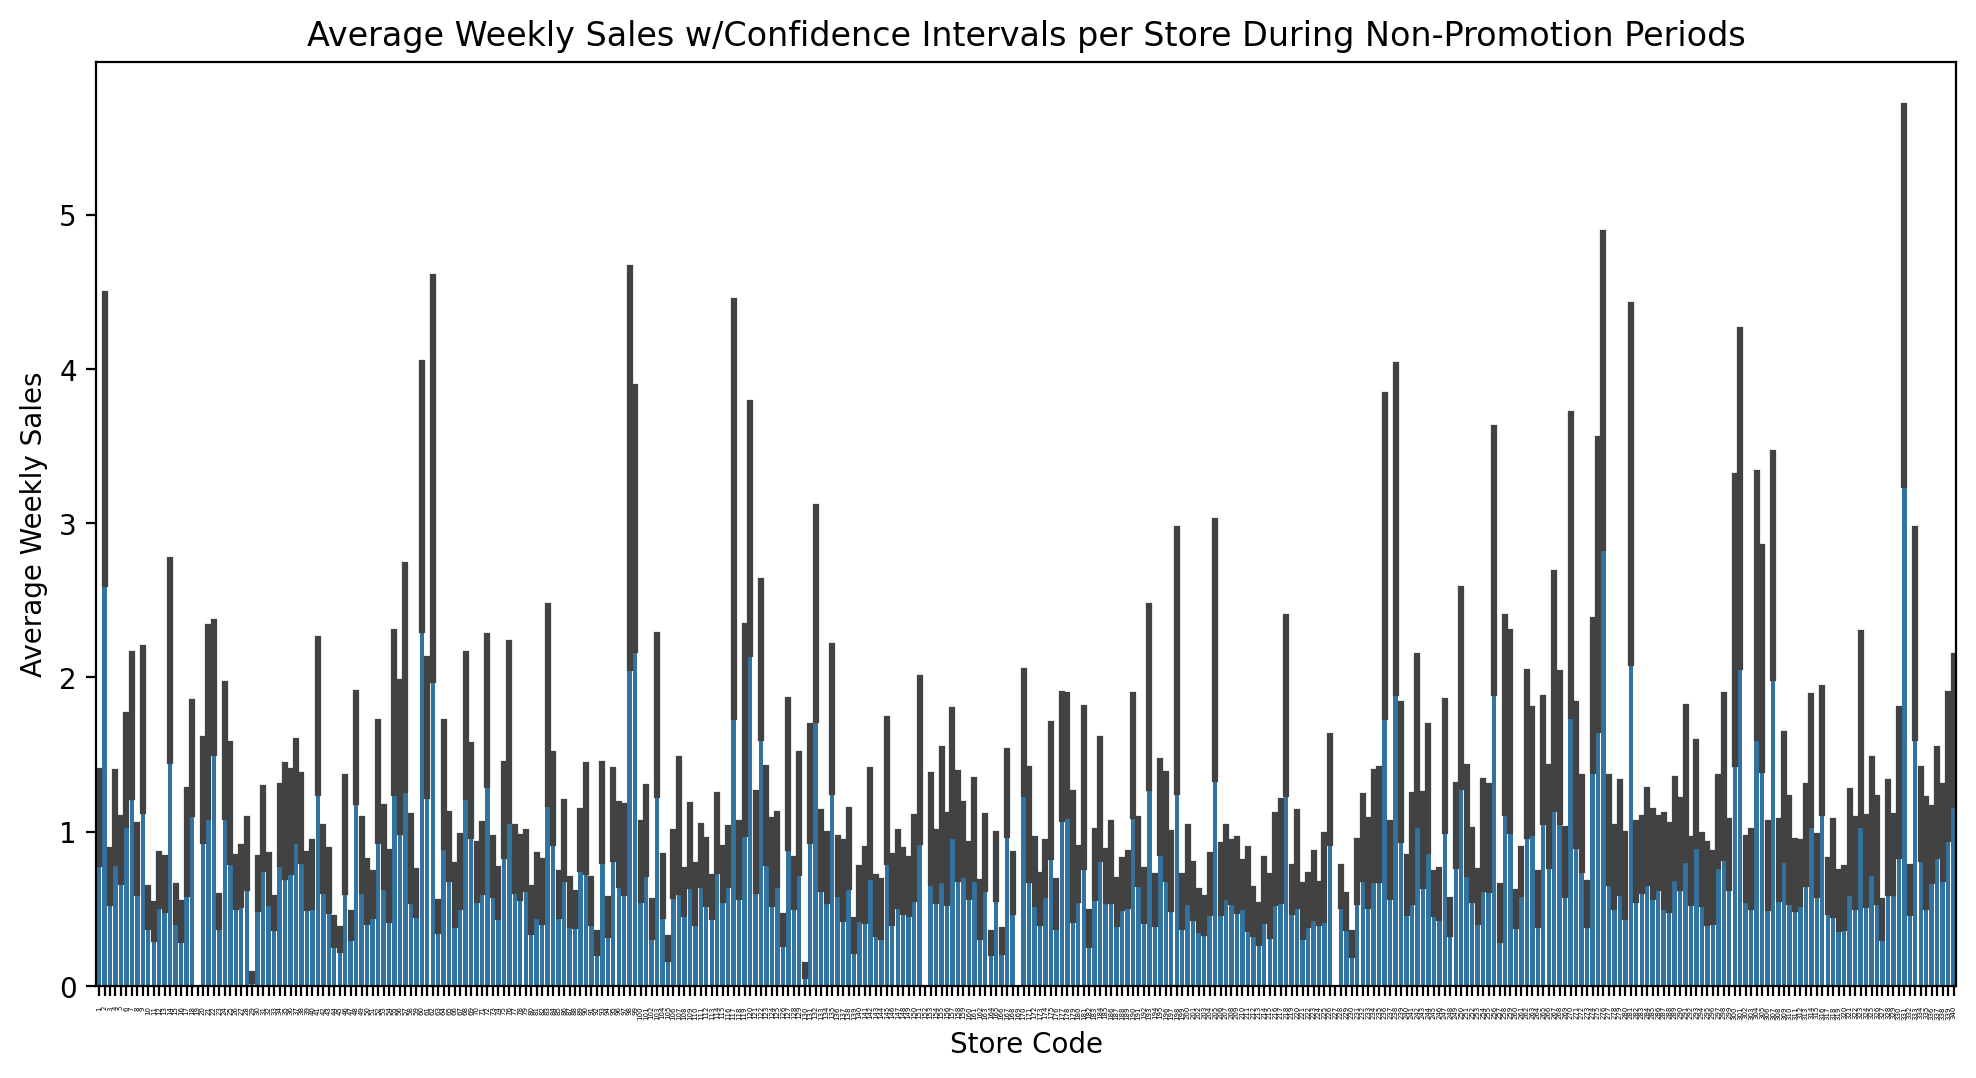

In [ ]:
# Plot the average weekly sales for each product.
plt.figure(figsize=(12,6),dpi=200)
plt.ylabel('Average Weekly Sales')
plt.xlabel('Store Code')
plt.title('Average Weekly Sales w/Confidence Intervals per Store During Non-Promotion Periods')
plt.xticks(fontsize=2.5, rotation=90)
sns.barplot(data=average_weekly_sales,x='StoreCode',y='SalesQuantity', estimator=np.mean, errorbar=("ci",95));

In [ ]:
# Sort the stores by average weekly sales in ascending order
average_weekly_sales_store = average_weekly_sales.groupby('StoreCode')['SalesQuantity'].agg('mean').reset_index()
average_weekly_sales_store_sorted = average_weekly_sales_store.sort_values(by='SalesQuantity', ascending=True)

In [ ]:
order = average_weekly_sales_store_sorted['StoreCode'].values

In [ ]:
average_weekly_sales_store_sorted.tail(10)

,StoreCode,SalesQuantity
116,117,2.943421
98,99,2.979139
59,60,3.073471
300,301,3.077338
61,62,3.172382
97,98,3.188359
280,281,3.199858
1,2,3.436044
275,276,3.773176
330,331,4.405312


<ipython-input-47-1672bc27f983>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_weekly_sales_store_sorted, x='StoreCode',y='SalesQuantity', order=order, palette='viridis');


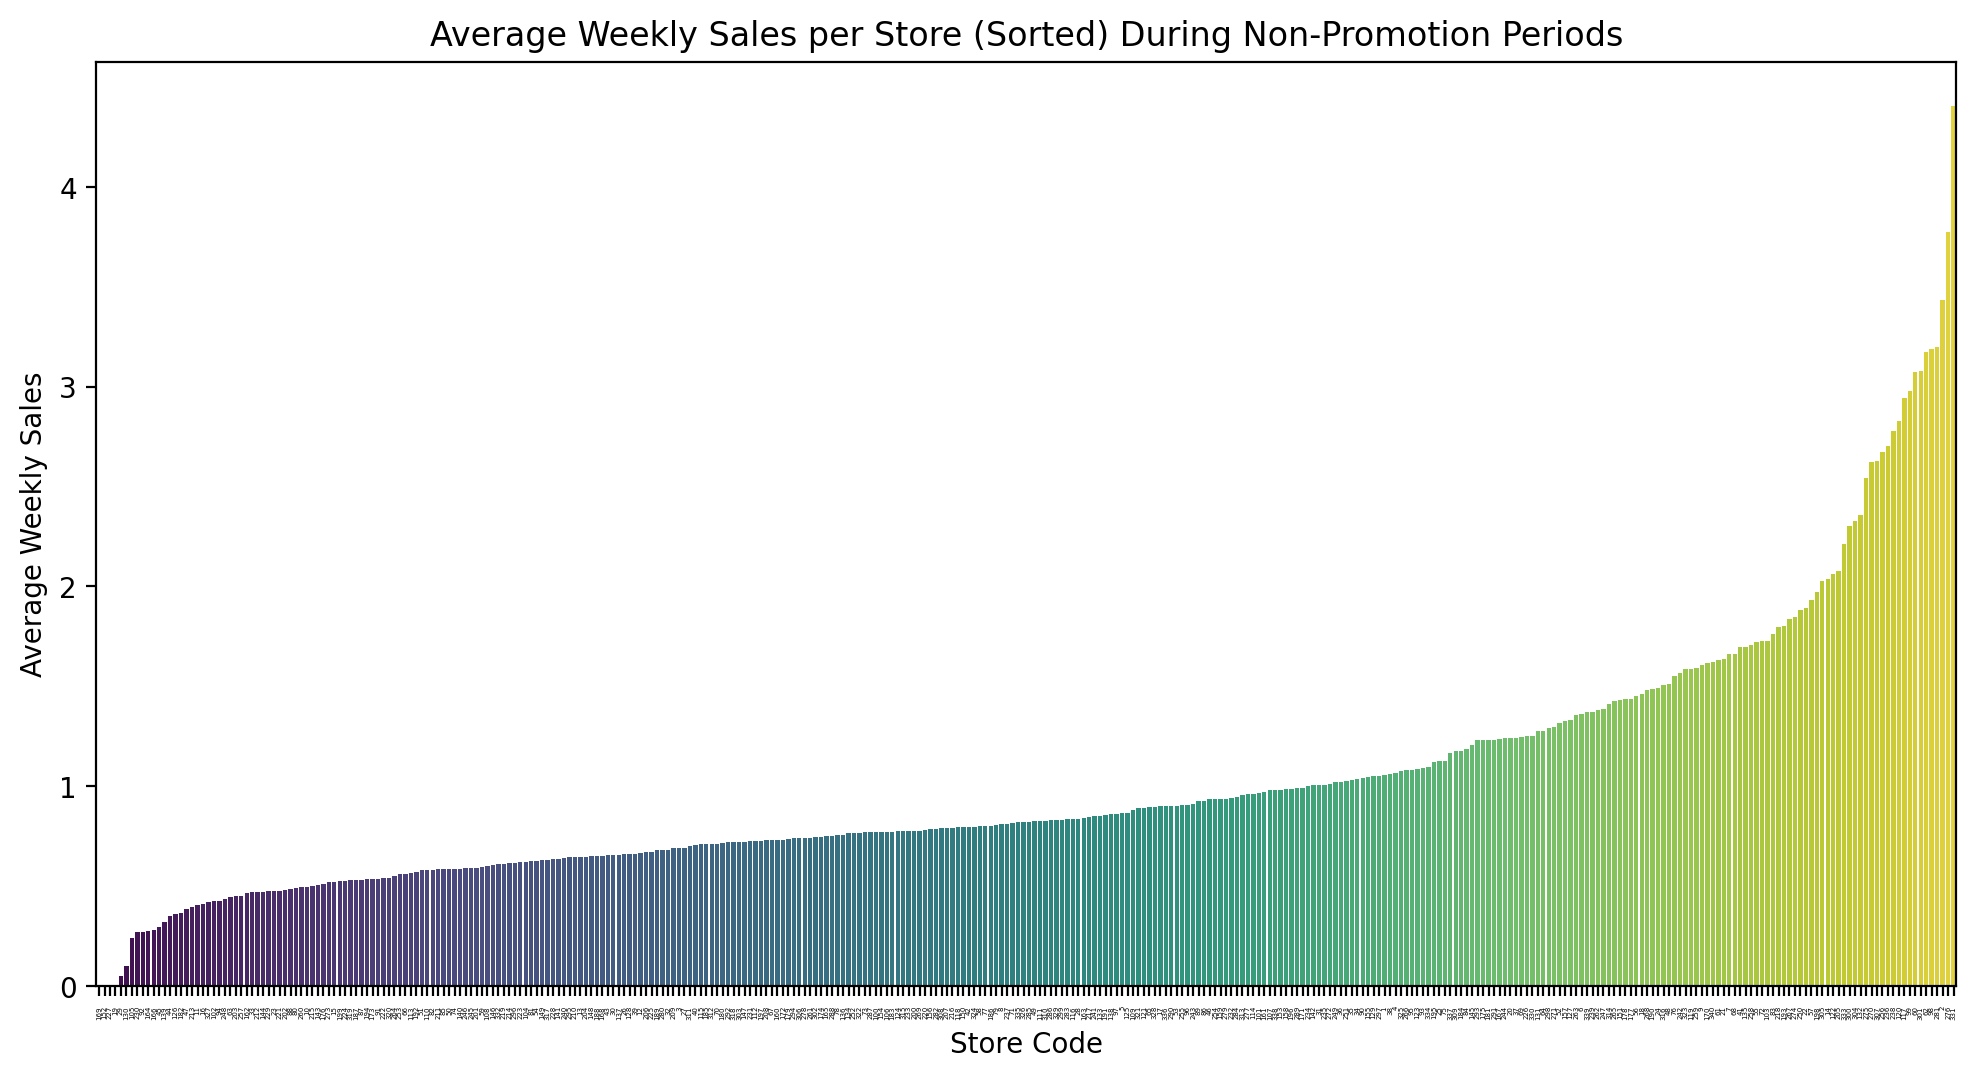

In [ ]:
# Plot the average weekly sales for each store across all stores in ascending order.
plt.figure(figsize=(12,6),dpi=200)
plt.ylabel('Average Weekly Sales')
plt.xlabel('Store Code')
plt.title('Average Weekly Sales per Store (Sorted) During Non-Promotion Periods')
plt.xticks(fontsize=2.5, rotation=90)
sns.barplot(data=average_weekly_sales_store_sorted, x='StoreCode',y='SalesQuantity', order=order, palette='viridis');



---



In [ ]:
# Calculate average weekly sales per store
weekly_sales_store = weekly_sales.groupby(['StoreCode','Week'])['SalesQuantity'].mean().reset_index()

In [ ]:
colors=['b','c' ,'g' ,'k', 'm']
# Weekly sales trend for selected store
def plot_store_trend(selected_stores):
  plt.figure(figsize=(12, 6), dpi=200)
  selected_weekly_sales = weekly_sales_store[weekly_sales_store['StoreCode'].isin(selected_stores)]
  i=0
  for store in selected_stores:
    c= colors[i]
    i = i+1
    store_sales = weekly_sales_store[weekly_sales_store['StoreCode'] == store]
    plt.plot(store_sales['Week'], store_sales['SalesQuantity'], label=f'Store {store}', color=c, linestyle='-',linewidth=0.5, marker='o', markersize=1.9)
    plt.axhline(average_weekly_sales_store[average_weekly_sales_store['StoreCode']==store].values[0][1], color=c, linewidth=1.5, alpha=0.35)

  plt.title('Weekly Sales Trend for Selected Stores During Non-Promotion Periods')
  plt.xlabel('Week')
  plt.ylabel('Sales Quantity')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

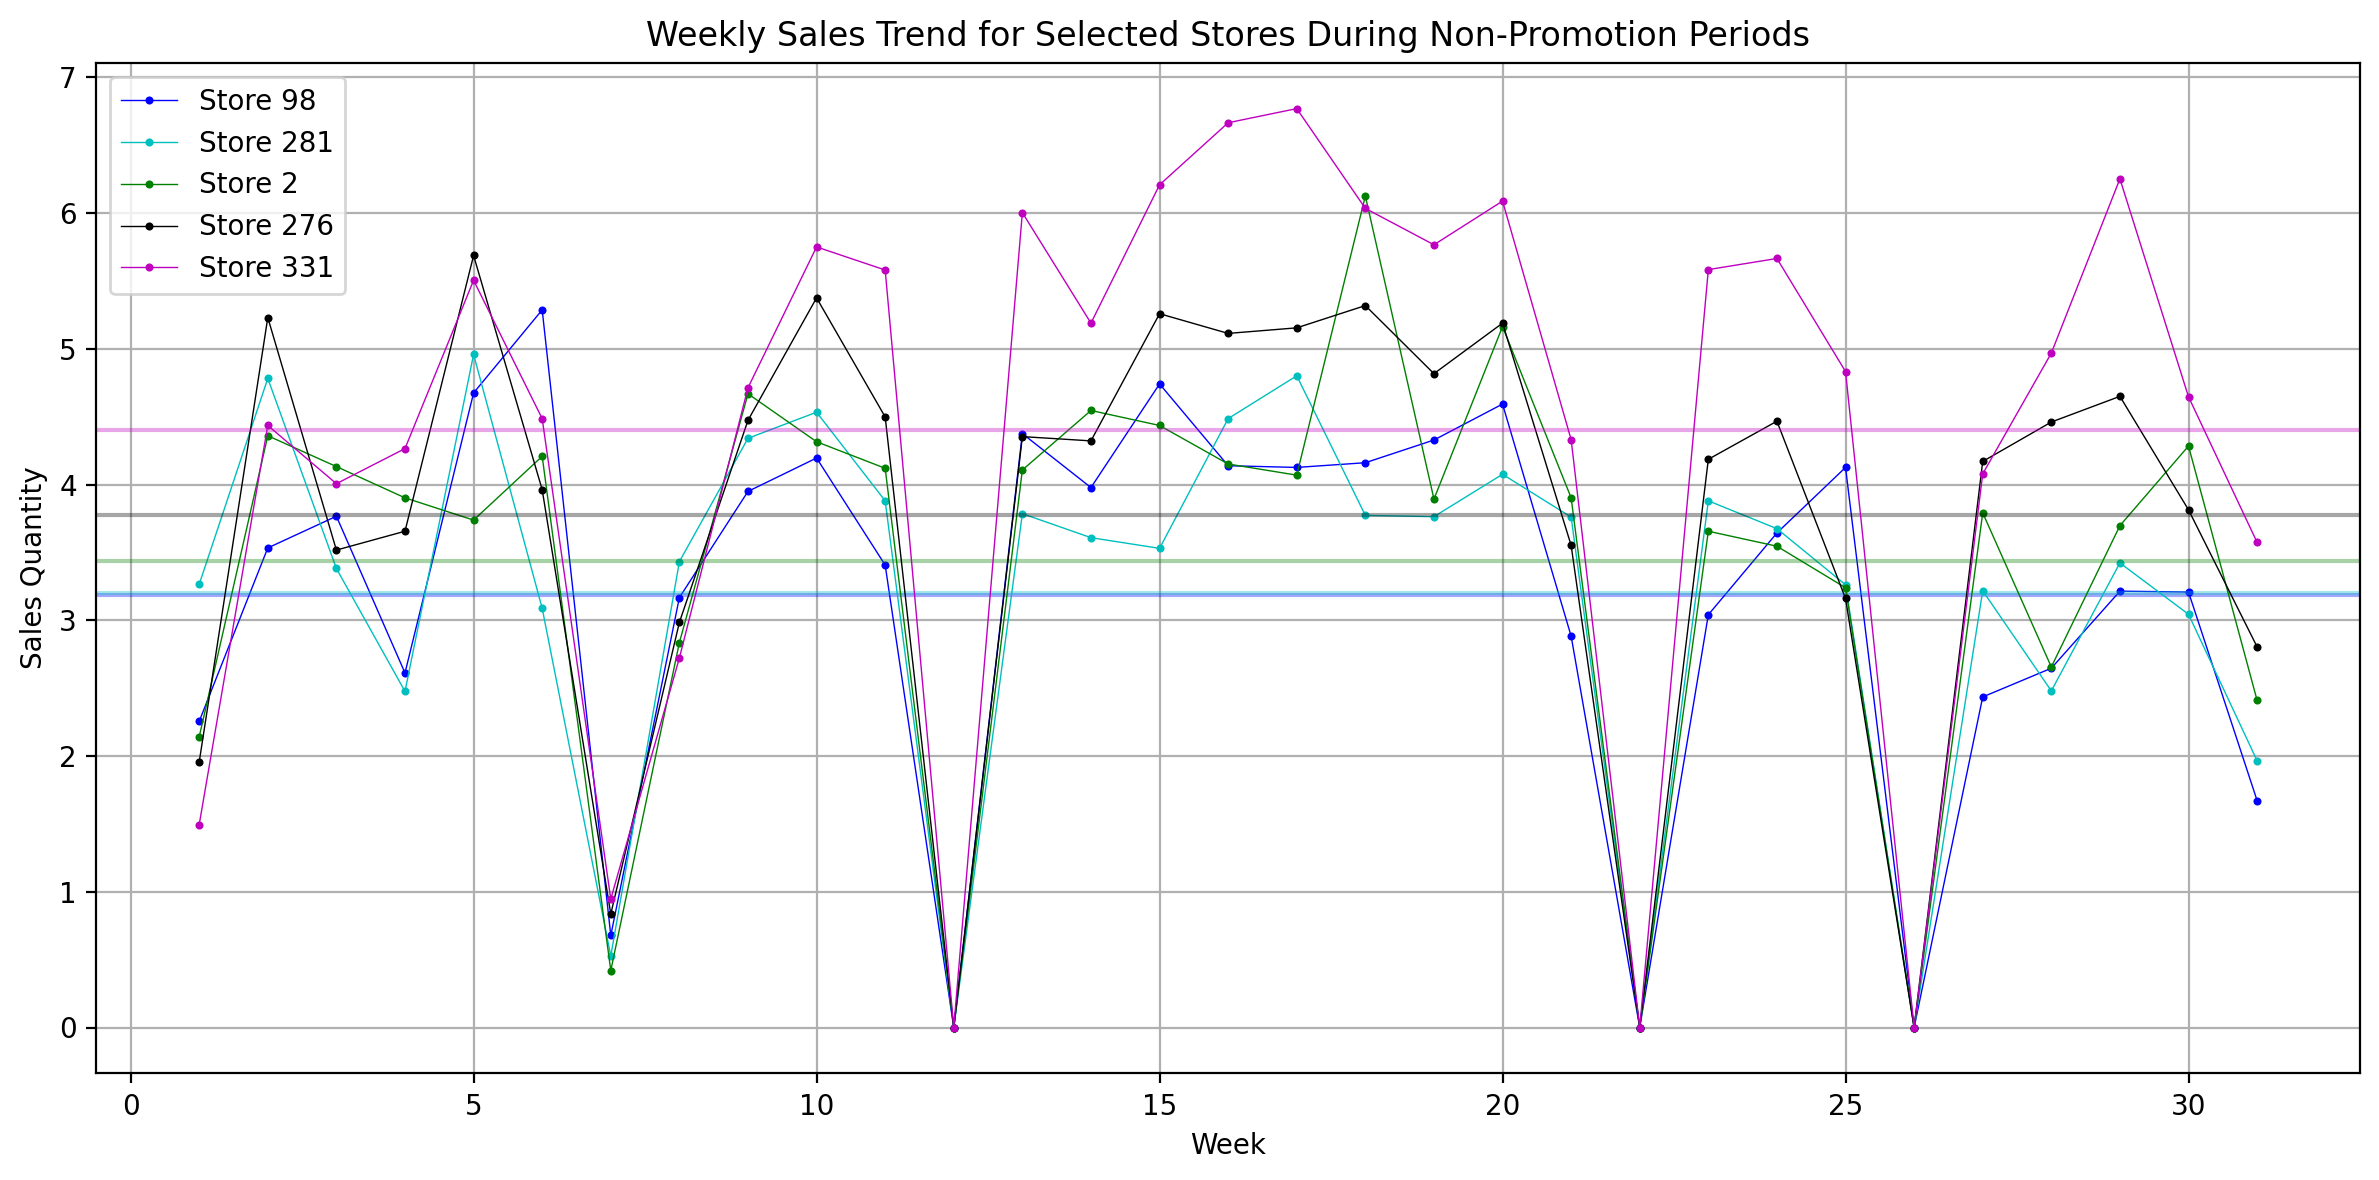

In [ ]:
# Plot weekly sales trend for selected stores
plot_store_trend(average_weekly_sales_store_sorted['StoreCode'].tail(5).values)

---

# Part 2:  Classification for Products & Stores


###( a-b ) What are your criteria for separating Fast, Medium and Slow items and stores? Why?


####Percentile-Based Classification

 This approach ensures a balanced classification into three groups which would enable us to see if there is significant difference between promotion impacts of the different categories in products and stores easier. Also this approach avoids arbitrary thresholds and takes the distribution of sales into account.

In [ ]:
# Determine Fast, Medium, and Slow items by percentile criteria (33% percentile each)
average_weekly_sales_product['Category'] = pd.qcut(average_weekly_sales_product['SalesQuantity'], q=3, labels=['Slow', 'Medium', 'Fast'])

In [ ]:
average_weekly_sales_product.head()

,ProductCode,SalesQuantity,Category
0,1,0.895161,Fast
1,2,0.674953,Medium
2,3,0.490797,Medium
3,4,0.599620,Medium
4,5,0.723624,Fast


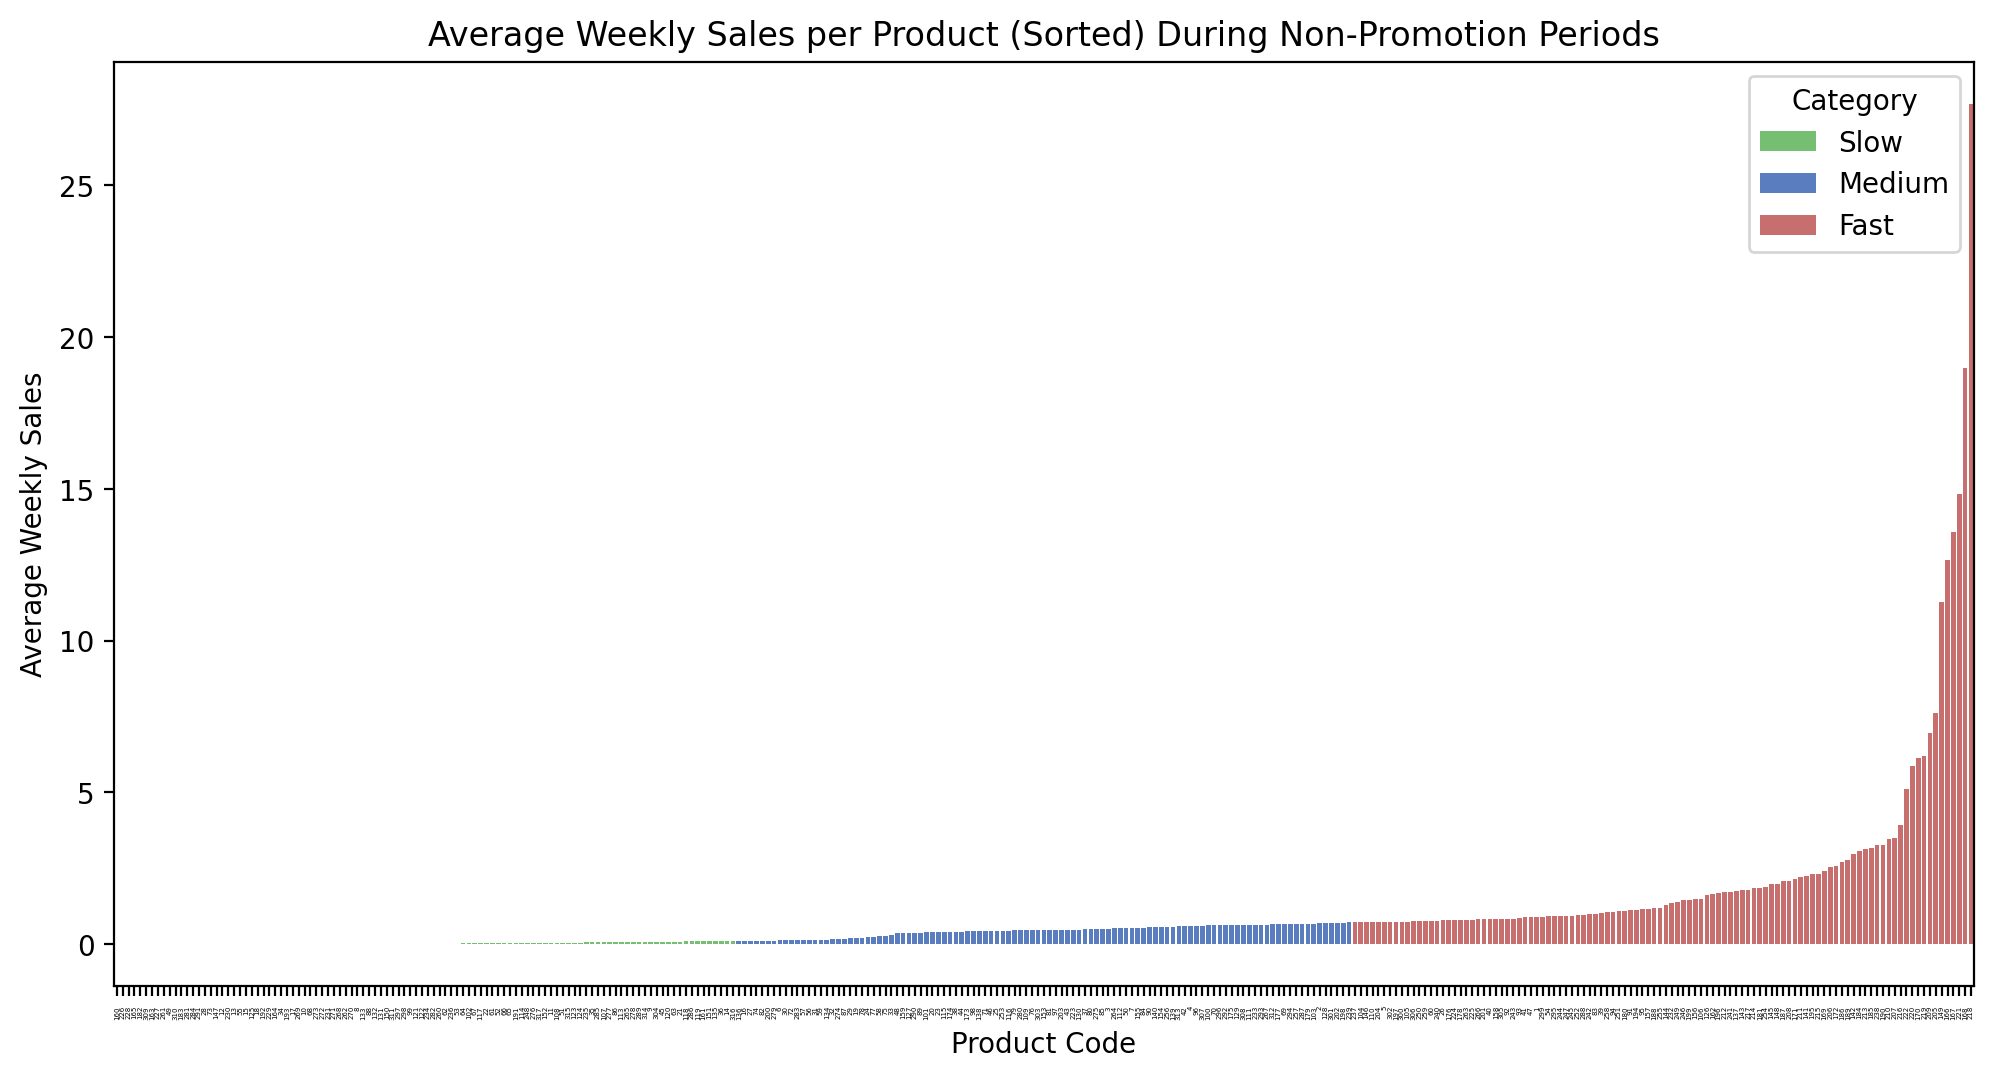

In [ ]:
average_weekly_sales_product_sorted = average_weekly_sales_product.sort_values(by='SalesQuantity', ascending=True)
order = average_weekly_sales_product_sorted['ProductCode'].values
# Plot the average weekly sales for each product across all stores in ascending order.
plt.figure(figsize=(12,6),dpi=200)
plt.ylabel('Average Weekly Sales')
plt.xlabel('Product Code')
plt.title('Average Weekly Sales per Product (Sorted) During Non-Promotion Periods')
plt.xticks(fontsize=2.5, rotation=90)
muted    = dict(Slow="#6ACC65", Medium="#4878CF", Fast="#D65F5F")
sns.barplot(data=average_weekly_sales_product_sorted, x='ProductCode',y='SalesQuantity', hue='Category', order=order, palette=muted);

---

In [ ]:
# Calculate average weekly sales per store
average_weekly_sales_store = weekly_sales.groupby('StoreCode')['SalesQuantity'].mean().reset_index()

In [ ]:
# Determine Fast, Medium, and Slow stores
average_weekly_sales_store['Category'] = pd.qcut(average_weekly_sales_store['SalesQuantity'], q=3, labels=['Slow', 'Medium', 'Fast'])

In [ ]:
average_weekly_sales_store.head()

,StoreCode,SalesQuantity,Category
0,1,1.055663,Fast
1,2,3.436044,Fast
2,3,0.690241,Slow
3,4,1.064313,Fast
4,5,0.865880,Medium


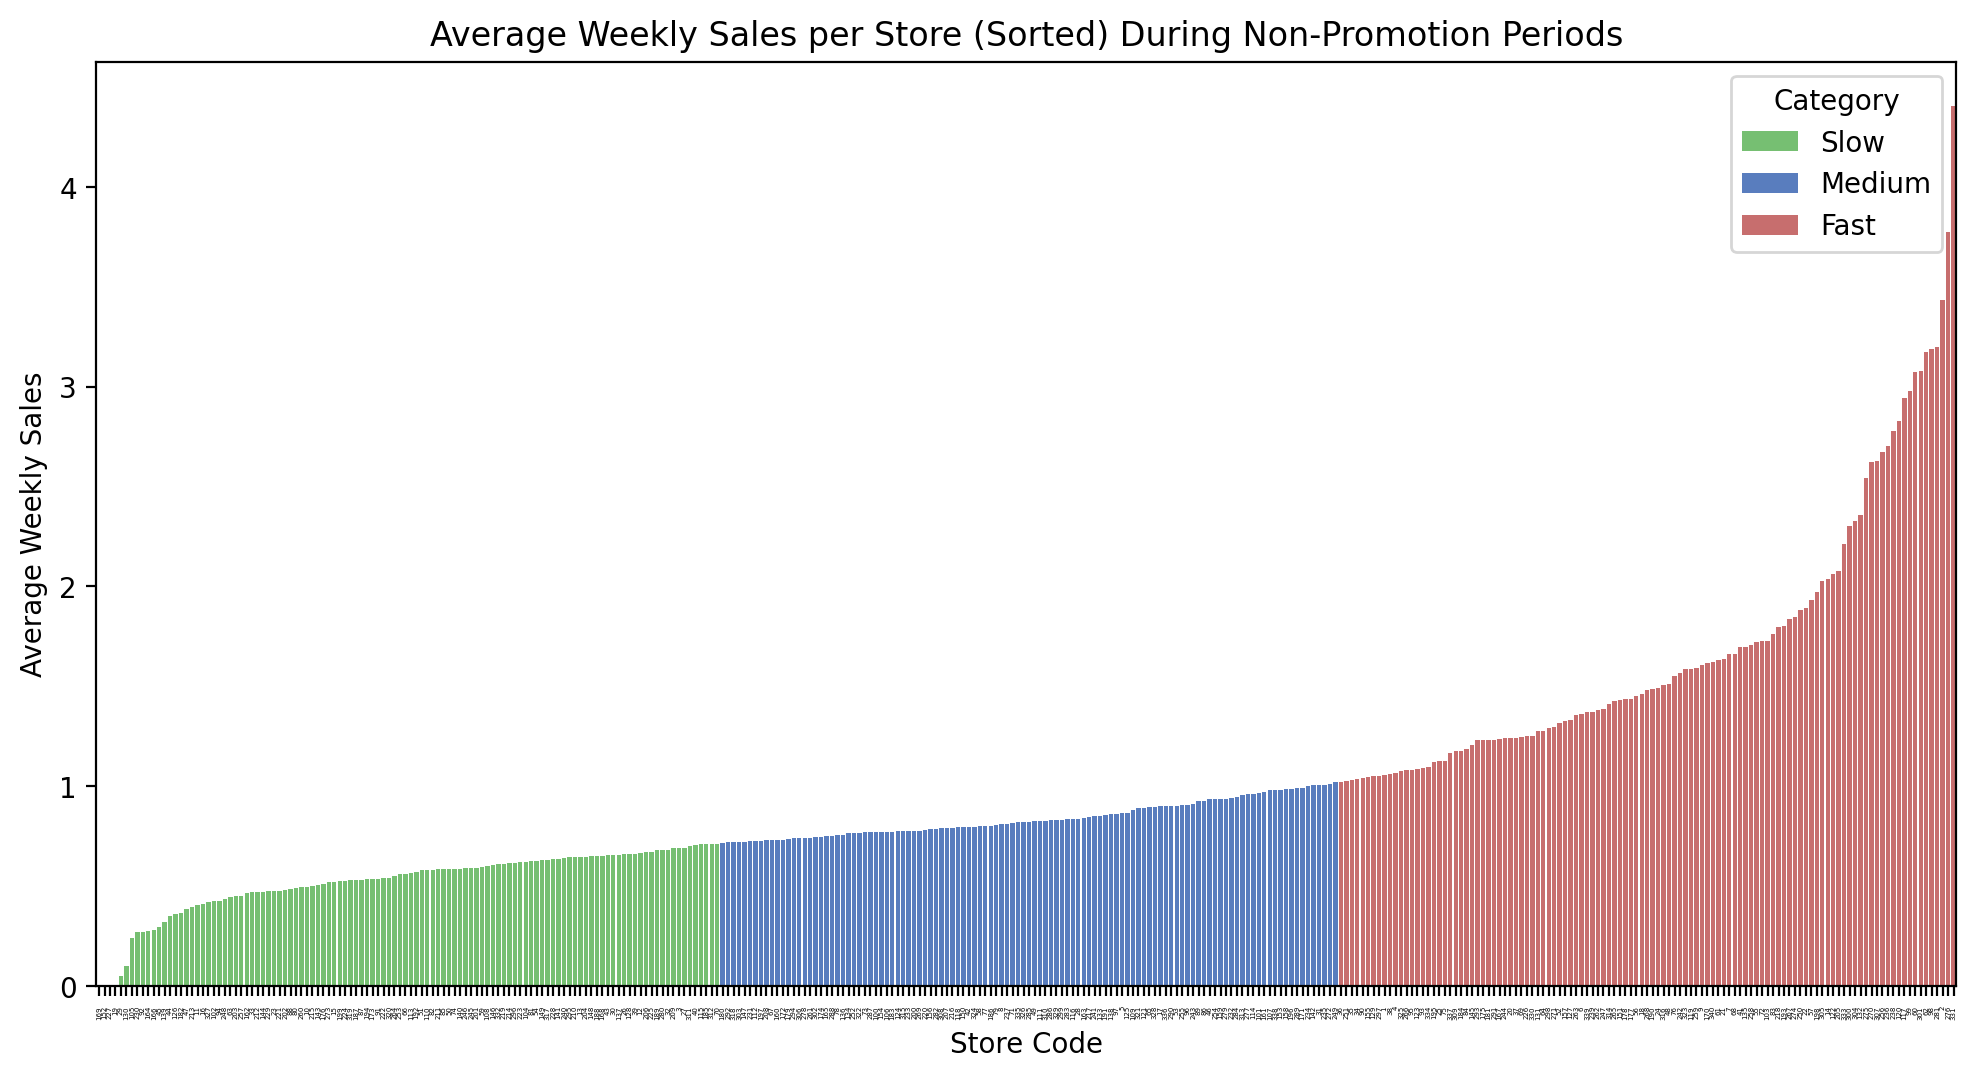

In [ ]:
# Sort the stores by average weekly sales in ascending order
average_weekly_sales_store_sorted = average_weekly_sales_store.sort_values(by='SalesQuantity', ascending=True)
order = average_weekly_sales_store_sorted['StoreCode'].values
# Plot the average weekly sales for each store for all products in ascending order.
plt.figure(figsize=(12,6),dpi=200)
plt.ylabel('Average Weekly Sales')
plt.xlabel('Store Code')
plt.title('Average Weekly Sales per Store (Sorted) During Non-Promotion Periods')
plt.xticks(fontsize=2.5, rotation=90)
muted    = dict(Slow="#6ACC65", Medium="#4878CF", Fast="#D65F5F")
sns.barplot(data=average_weekly_sales_store_sorted, x='StoreCode',y='SalesQuantity', hue='Category', order=order, palette=muted);

---

####K-Means Clustering

K-means clustering identifies natural groupings in the data, ensuring that products and stores within each cluster have similar sales behaviors. This leads to more accurate and meaningful classification which would enable us to do better decision making and predictions.

In [ ]:
X = average_weekly_sales_product[['SalesQuantity']]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=3)

In [ ]:
cluster_labels = model.fit_predict(scaled_X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
len(cluster_labels)

317

In [ ]:
average_weekly_sales_product['Cluster'] = cluster_labels

In [ ]:
average_weekly_sales_product.drop('Category', axis=1, inplace=True)

In [ ]:
# Analyze clusters and assign categories
clusters = average_weekly_sales_product.groupby('Cluster')['SalesQuantity'].mean().sort_values()
cluster_map = {cluster_id: rank for rank, cluster_id in enumerate(clusters.index)}
average_weekly_sales_product['Category'] = average_weekly_sales_product['Cluster'].map(cluster_map).map({0: 'Slow', 1: 'Medium', 2: 'Fast'})

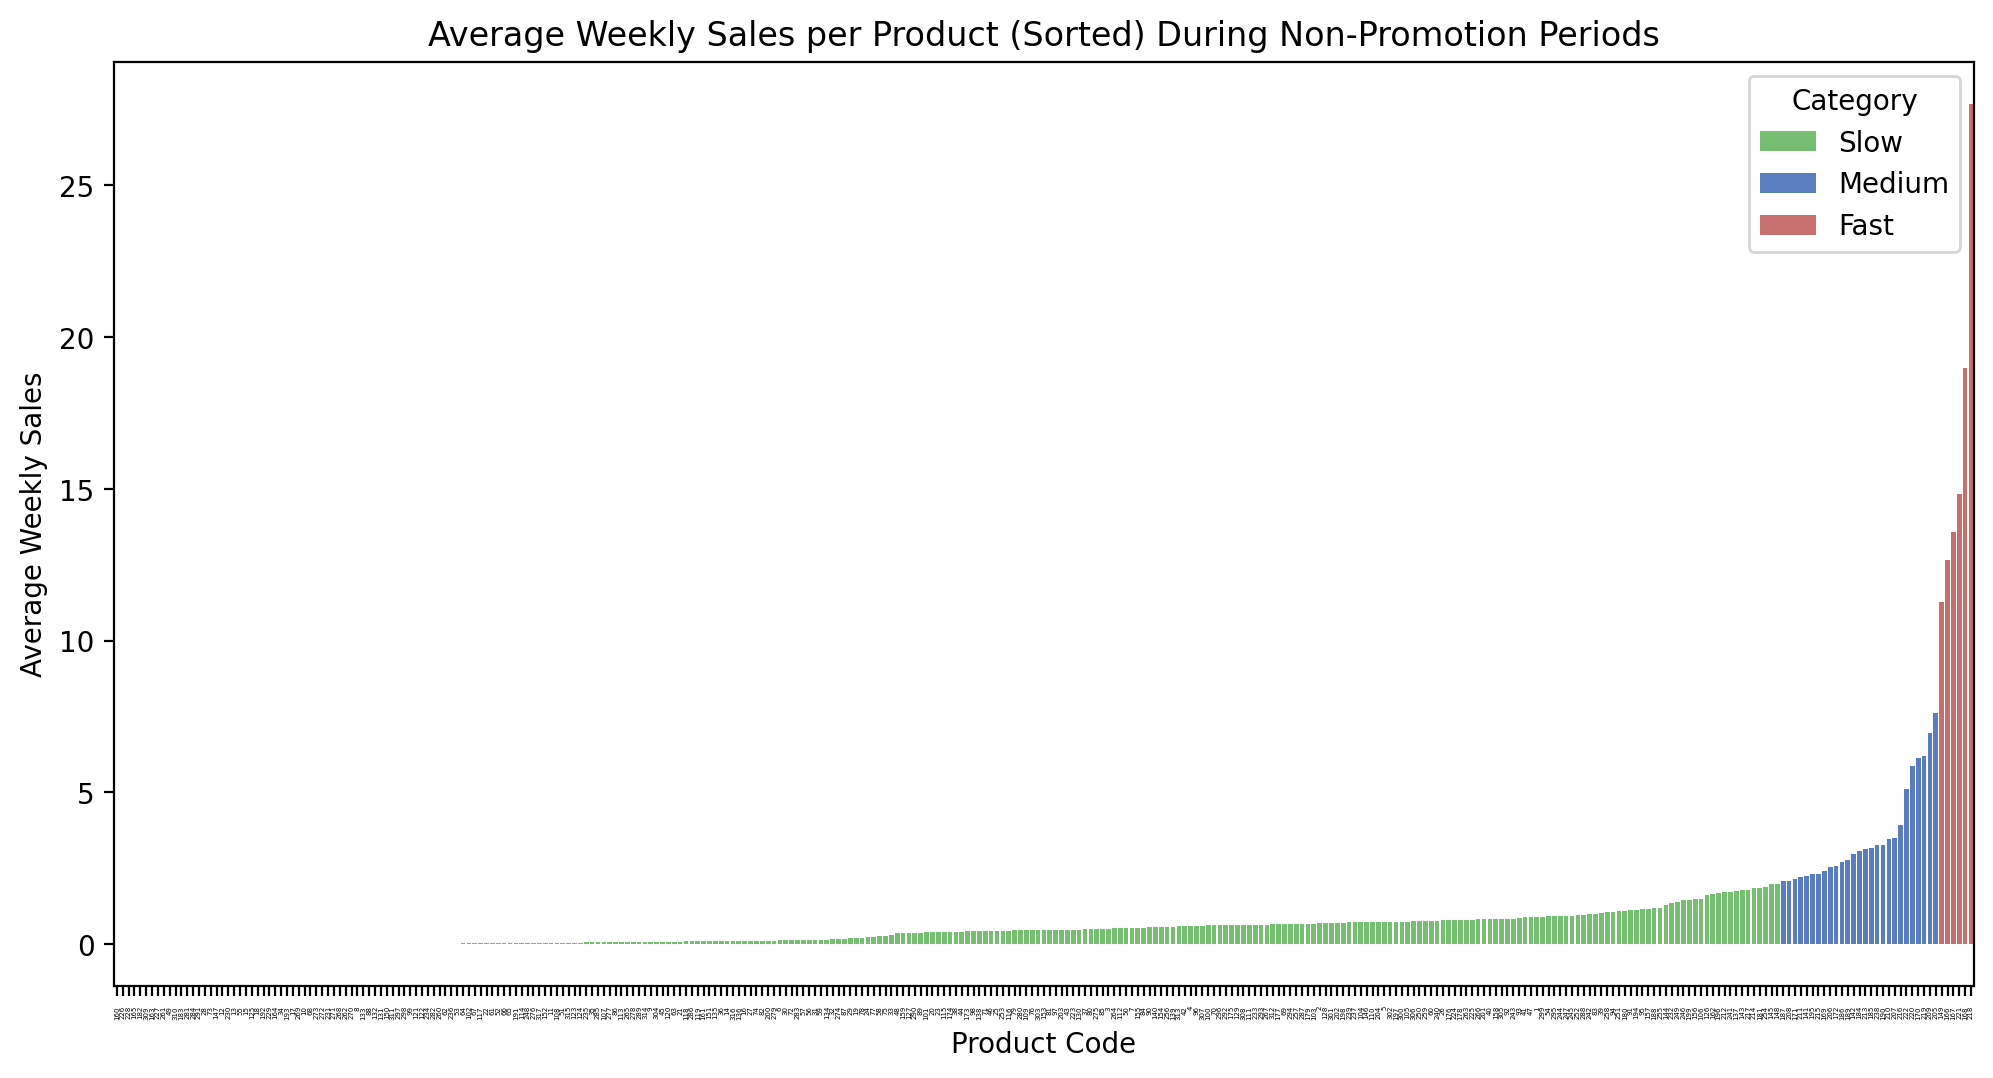

In [ ]:
# Visualization
average_weekly_sales_product_sorted = average_weekly_sales_product.sort_values(by='SalesQuantity', ascending=True)
order = average_weekly_sales_product_sorted['ProductCode'].values
# Plot the average weekly sales for each product across all stores in ascending order.
plt.figure(figsize=(12,6),dpi=200)
plt.ylabel('Average Weekly Sales')
plt.xlabel('Product Code')
plt.title('Average Weekly Sales per Product (Sorted) During Non-Promotion Periods')
plt.xticks(fontsize=2.5, rotation=90)
muted    = dict(Slow="#6ACC65", Medium="#4878CF", Fast="#D65F5F")
sns.barplot(data=average_weekly_sales_product_sorted, x='ProductCode',y='SalesQuantity', hue='Category', order=order, palette=muted);

---

In [ ]:
X = average_weekly_sales_store[['SalesQuantity']]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=3)

In [ ]:
cluster_labels = model.fit_predict(scaled_X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_labels

array([0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 2, 2, 0,
       2, 0, 2, 2, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 1, 1,

In [ ]:
len(cluster_labels)

340

In [ ]:
average_weekly_sales_store['Cluster'] = cluster_labels

In [ ]:
average_weekly_sales_store.drop('Category', axis=1, inplace=True)

In [ ]:
# Analyze clusters and assign categories
clusters = average_weekly_sales_store.groupby('Cluster')['SalesQuantity'].mean().sort_values()
cluster_map = {cluster_id: rank for rank, cluster_id in enumerate(clusters.index)}
average_weekly_sales_store['Category'] = average_weekly_sales_store['Cluster'].map(cluster_map).map({0: 'Slow', 1: 'Medium', 2: 'Fast'})

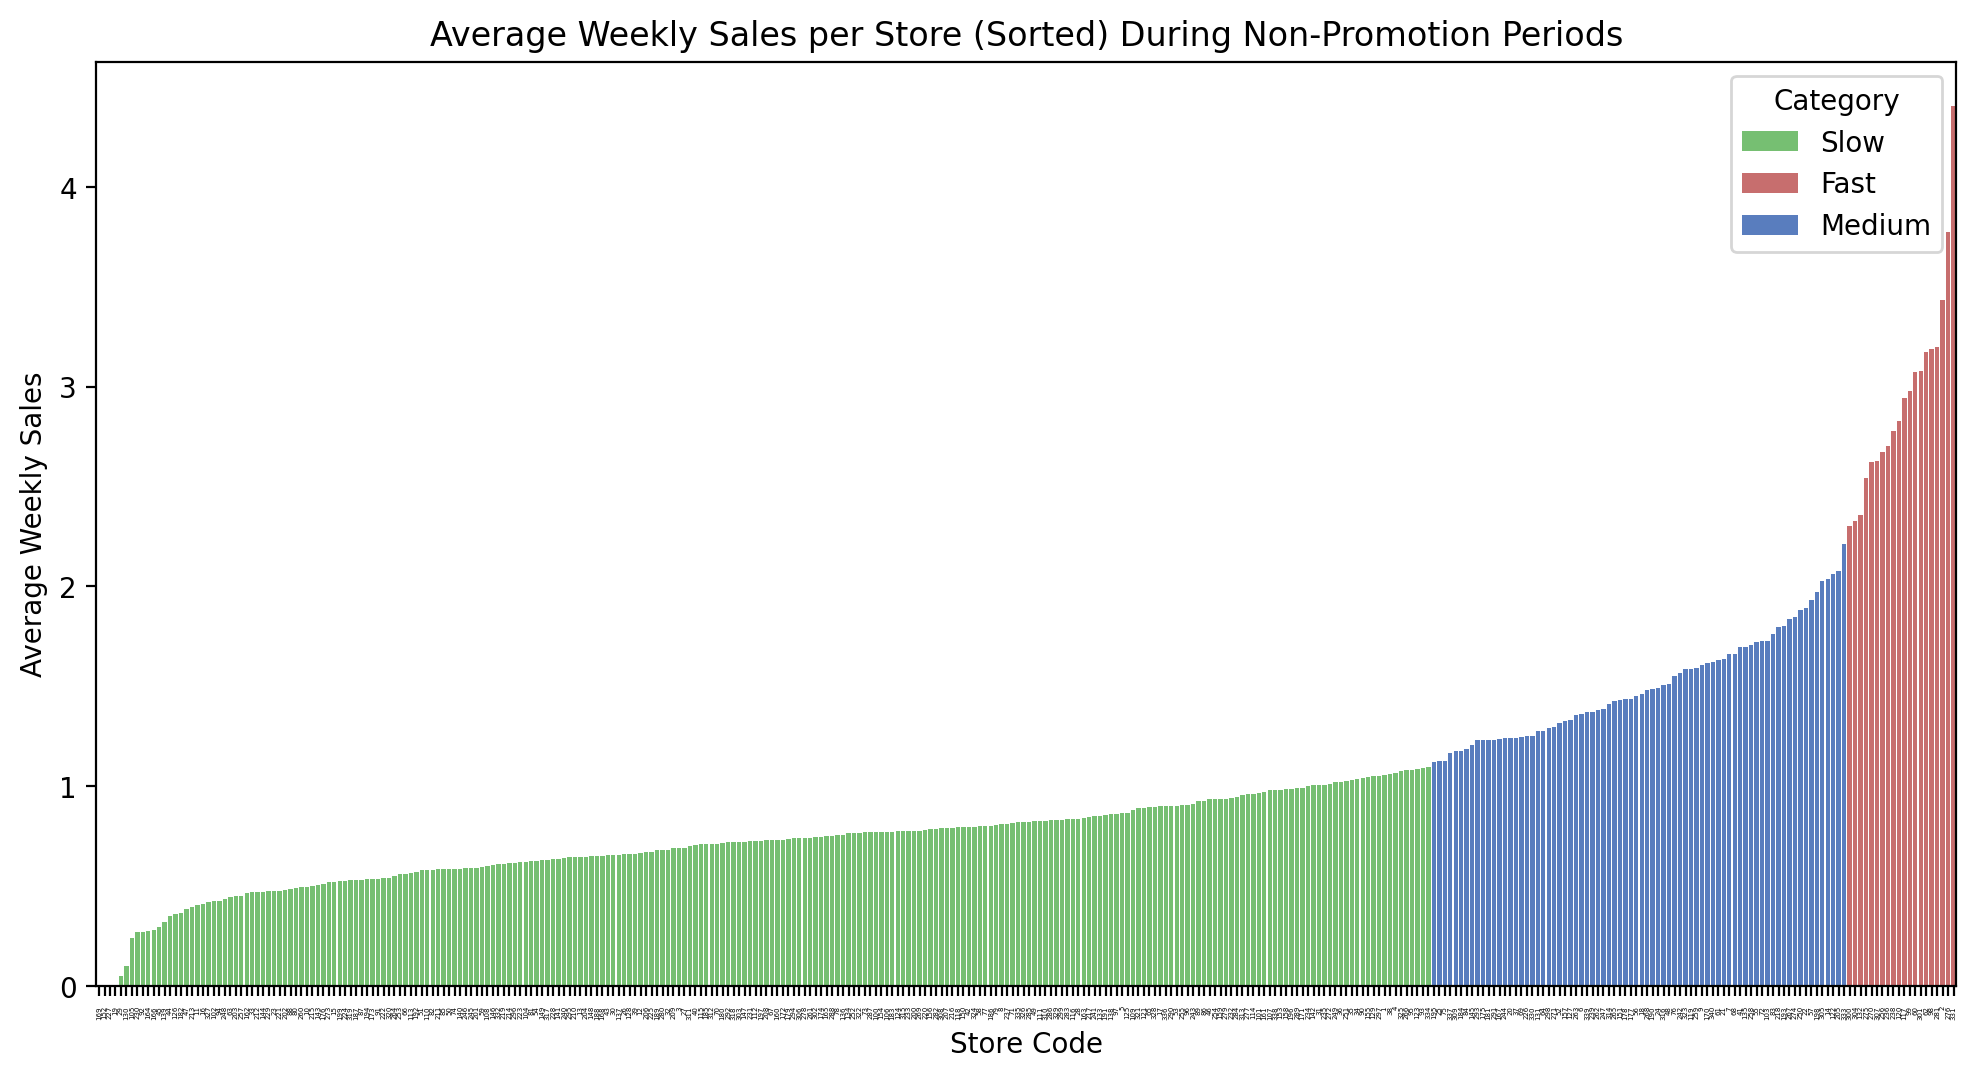

In [ ]:
# Visualization
average_weekly_sales_store_sorted = average_weekly_sales_store.sort_values(by='SalesQuantity', ascending=True)
order = average_weekly_sales_store_sorted['StoreCode'].values
# Plot the average weekly sales for each product across all stores in ascending order.
plt.figure(figsize=(12,6),dpi=200)
plt.ylabel('Average Weekly Sales')
plt.xlabel('Store Code')
plt.title('Average Weekly Sales per Store (Sorted) During Non-Promotion Periods')
plt.xticks(fontsize=2.5, rotation=90)
muted    = dict(Slow="#6ACC65", Medium="#4878CF", Fast="#D65F5F")
sns.barplot(data=average_weekly_sales_store_sorted, x='StoreCode',y='SalesQuantity', hue='Category', order=order, palette=muted);

---

In [ ]:
average_weekly_sales_product[['ProductCode', 'Category']].to_csv('product_categories.csv', index=False)

In [ ]:
average_weekly_sales_store[['StoreCode', 'Category']].to_csv('store_categories.csv', index=False)

---

#Part 3: Effects of Promotions

In [ ]:
# Calculate average daily sales per product during non-promotion periods
non_promotion_avg_sales_product = non_promotion_sales.groupby('ProductCode')['SalesQuantity'].mean().reset_index()

In [ ]:
# Calculate average daily sales per product during promotion periods
promotion_avg_sales_product = promotion_sales.groupby('ProductCode')['SalesQuantity'].mean().reset_index()

In [ ]:
# Merge the two average sales dataframes
sales_comparison_product = pd.merge(non_promotion_avg_sales_product, promotion_avg_sales_product, on='ProductCode', how='inner')

In [ ]:
sales_comparison_product.columns = ['ProductCode', 'NonPromotionAvgSales', 'PromotionAvgSales']

In [ ]:
sales_comparison_product.head()

,ProductCode,NonPromotionAvgSales,PromotionAvgSales
0,1,2.383780,2.421702
1,2,2.201114,2.340223
2,3,1.763122,2.000000
3,4,2.153322,2.175747
4,5,1.979496,2.365607


###( c ) Which items experienced the biggest sale increase during promotions?


You can find the top 10 products with the biggest sales increase and the a bar chart illustrating sales increase after promotion for each product across all stores in ascending order below.


In [ ]:
# Calculate the sales increase during promotions
sales_comparison_product['SalesIncrease'] = sales_comparison_product['PromotionAvgSales'] - sales_comparison_product['NonPromotionAvgSales']

In [ ]:
# Sort items by the sales increase
sales_comparison_product_sorted = sales_comparison_product.sort_values(by='SalesIncrease', ascending=False)

In [ ]:
#Top 10 items experienced the biggest sale increase during promotions
sales_comparison_product_sorted.head(10)

,ProductCode,NonPromotionAvgSales,PromotionAvgSales,SalesIncrease
207,218,9.497770,13.896740,4.398970
215,226,-2.000000,1.000000,3.000000
210,221,5.824391,8.376676,2.552284
225,238,8.986409,10.967062,1.980653
198,209,4.221652,6.160011,1.938359
194,205,3.870475,5.643238,1.772763
208,219,3.983091,5.645890,1.662799
209,220,4.113117,5.764725,1.651608
55,61,1.392593,3.000000,1.607407
226,239,5.830203,7.375000,1.544797


<ipython-input-91-fc071378c43e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_comparison_product_sorted, x='ProductCode',y='SalesIncrease', order=order, palette='viridis');


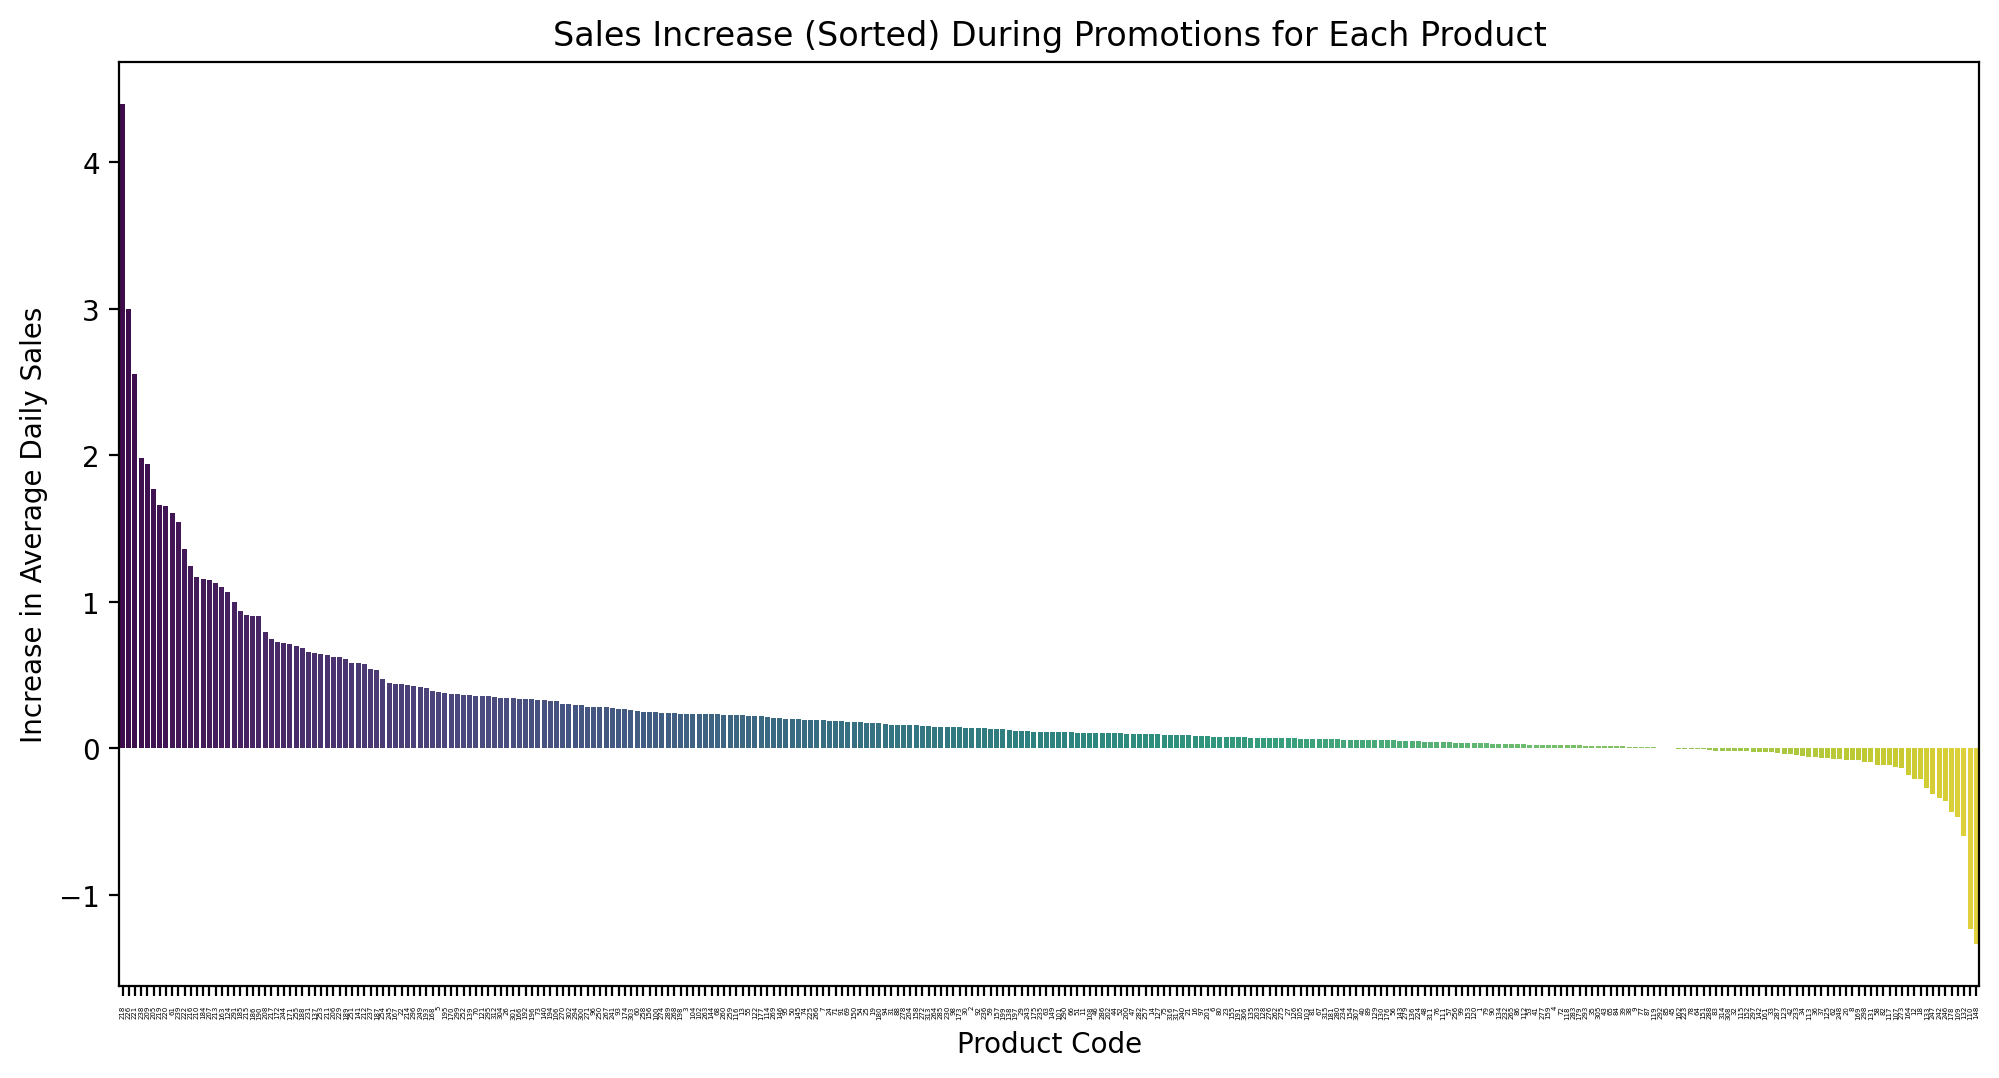

In [ ]:
order = sales_comparison_product_sorted['ProductCode'].values
# Plot the sales increase after promotion for each product across all stores in ascending order.
plt.figure(figsize=(12,6),dpi=200)

plt.ylabel('Increase in Average Daily Sales')
plt.xlabel('Product Code')
plt.title('Sales Increase (Sorted) During Promotions for Each Product')
plt.xticks(fontsize=2.5, rotation=90)
sns.barplot(data=sales_comparison_product_sorted, x='ProductCode',y='SalesIncrease', order=order, palette='viridis');

In [ ]:
sales_comparison_product_sorted_cat = sales_comparison_product_sorted.merge(average_weekly_sales_product[['ProductCode', 'Category']], on='ProductCode', how='left')

In [ ]:
sales_comparison_product_sorted_cat.head()

,ProductCode,NonPromotionAvgSales,PromotionAvgSales,SalesIncrease,Category
0,218,9.497770,13.896740,4.398970,Fast
1,226,-2.000000,1.000000,3.000000,Slow
2,221,5.824391,8.376676,2.552284,Fast
3,238,8.986409,10.967062,1.980653,Medium
4,209,4.221652,6.160011,1.938359,Medium


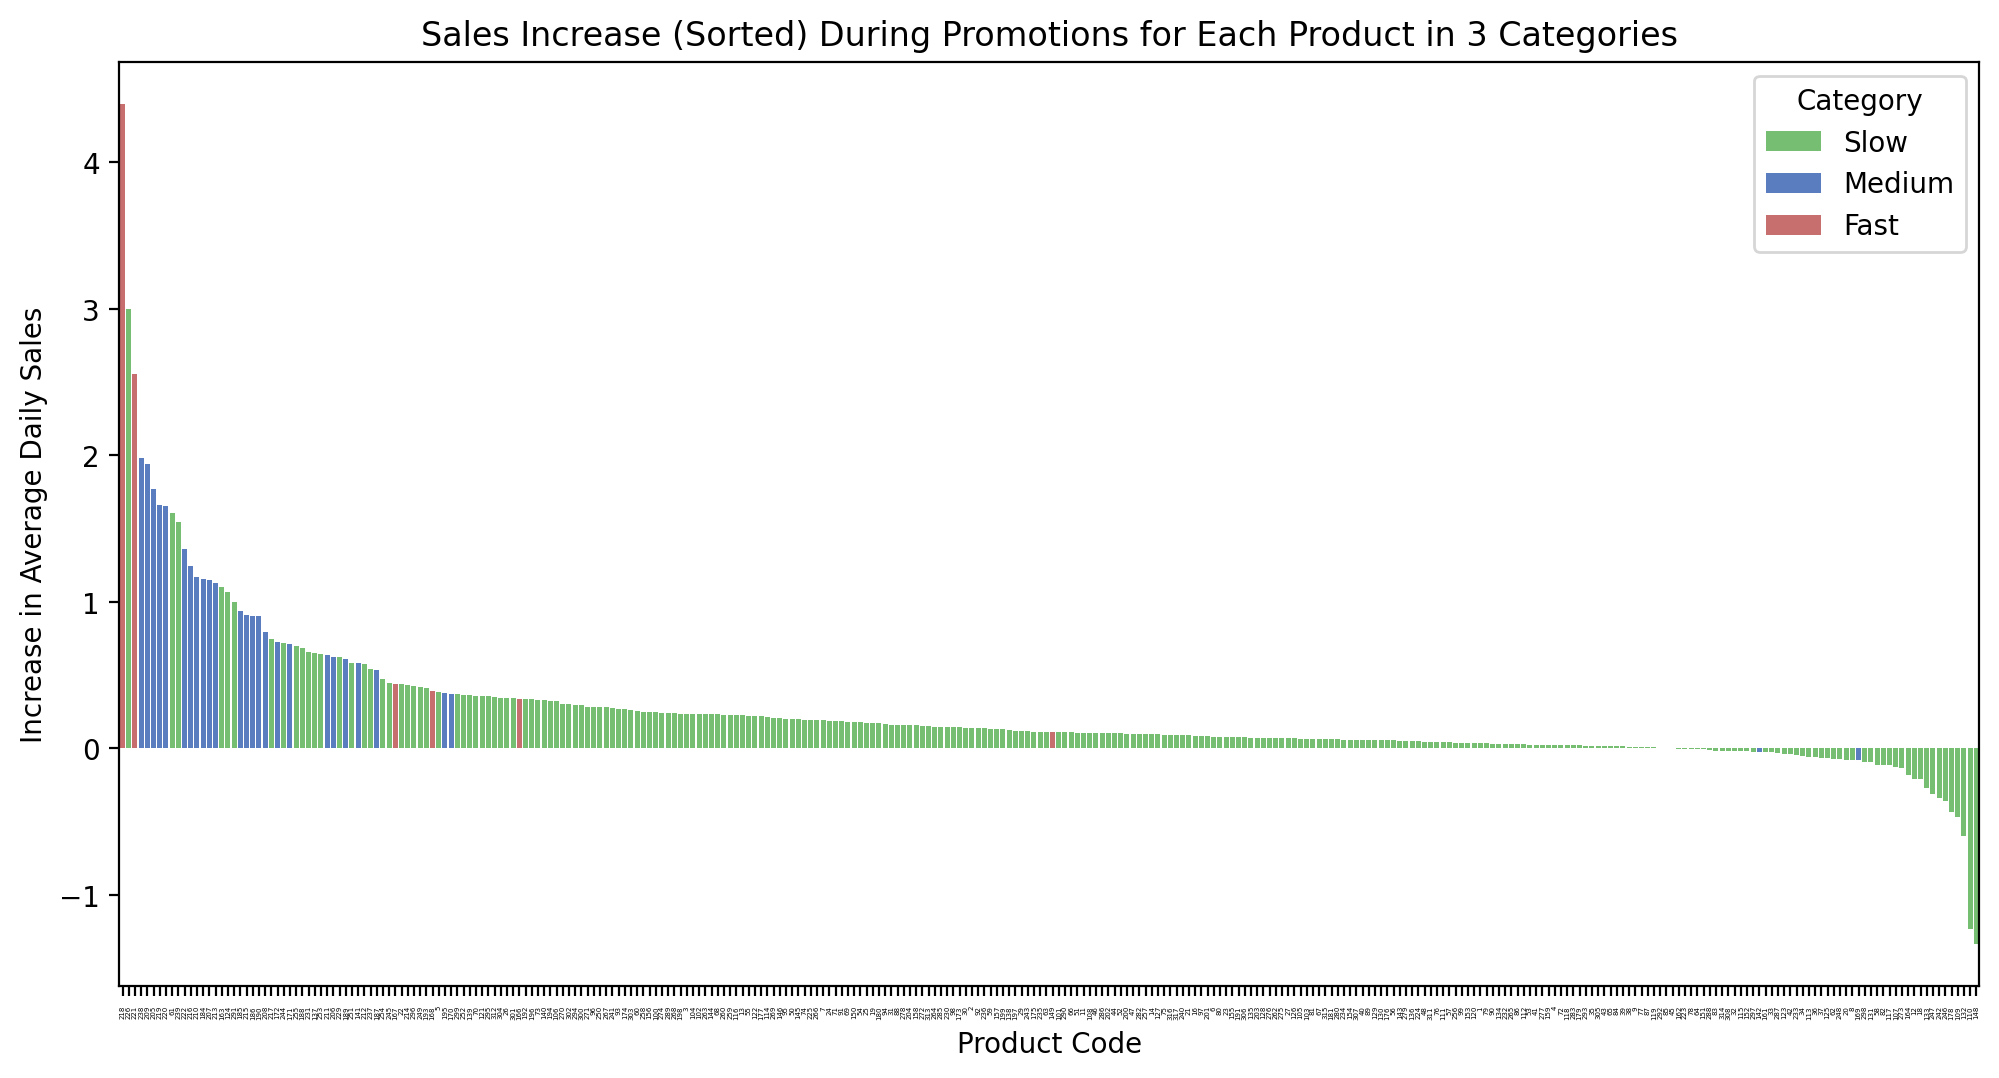

In [ ]:
order = sales_comparison_product_sorted_cat['ProductCode'].values
# Plot the sales increase after promotion for each product across all stores in ascending order.
plt.figure(figsize=(12,6),dpi=200)
plt.ylabel('Increase in Average Daily Sales')
plt.xlabel('Product Code')
plt.title('Sales Increase (Sorted) During Promotions for Each Product in 3 Categories')
plt.xticks(fontsize=2.5, rotation=90)
muted    = dict(Slow="#6ACC65", Medium="#4878CF", Fast="#D65F5F")
sns.barplot(data=sales_comparison_product_sorted_cat, x='ProductCode',y='SalesIncrease', hue='Category', order=order, palette=muted);

###( d ) Are there stores that have higher promotion reaction?

You can find the top 10 stores with the biggest sales increase and the a bar chart illustrating sales increase after promotion for each store across all stores in ascending order below.


In [ ]:
# Calculate the average daily sales during promotion and non-promotion periods for each store
non_promotion_avg_sales_store = non_promotion_sales.groupby('StoreCode')['SalesQuantity'].mean().reset_index()
# Calculate average daily sales per product during promotion periods
promotion_avg_sales_store = promotion_sales.groupby('StoreCode')['SalesQuantity'].mean().reset_index()

# Merge the average sales dataframes and calculate the sales increase
sales_comparison_store = pd.merge(non_promotion_avg_sales_store, promotion_avg_sales_store, on='StoreCode', how='inner')
sales_comparison_store.columns = ['StoreCode', 'NonPromotionAvgSales', 'PromotionAvgSales']
sales_comparison_store['SalesIncrease'] = sales_comparison_store['PromotionAvgSales'] - sales_comparison_store['NonPromotionAvgSales']

# Identify the stores with the largest sales increase during promotions
sales_comparison_store_sorted = sales_comparison_store.sort_values(by='SalesIncrease', ascending=False)

# Output the top stores
sales_comparison_store_sorted.head(10)

,StoreCode,NonPromotionAvgSales,PromotionAvgSales,SalesIncrease
90,92,1.846047,4.760684,2.914637
251,256,3.116119,4.996736,1.880617
201,205,3.861573,5.380863,1.519290
177,181,2.711883,4.157635,1.445752
152,155,2.785772,4.104735,1.318962
115,117,4.260569,5.547302,1.286733
19,21,2.897963,4.110595,1.212632
270,275,3.146182,4.285078,1.138896
313,318,2.156450,3.293160,1.136709
279,284,2.218900,3.347188,1.128289


<ipython-input-96-e3c1a15c4085>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_comparison_store_sorted, x='StoreCode',y='SalesIncrease', order=order, palette='viridis');


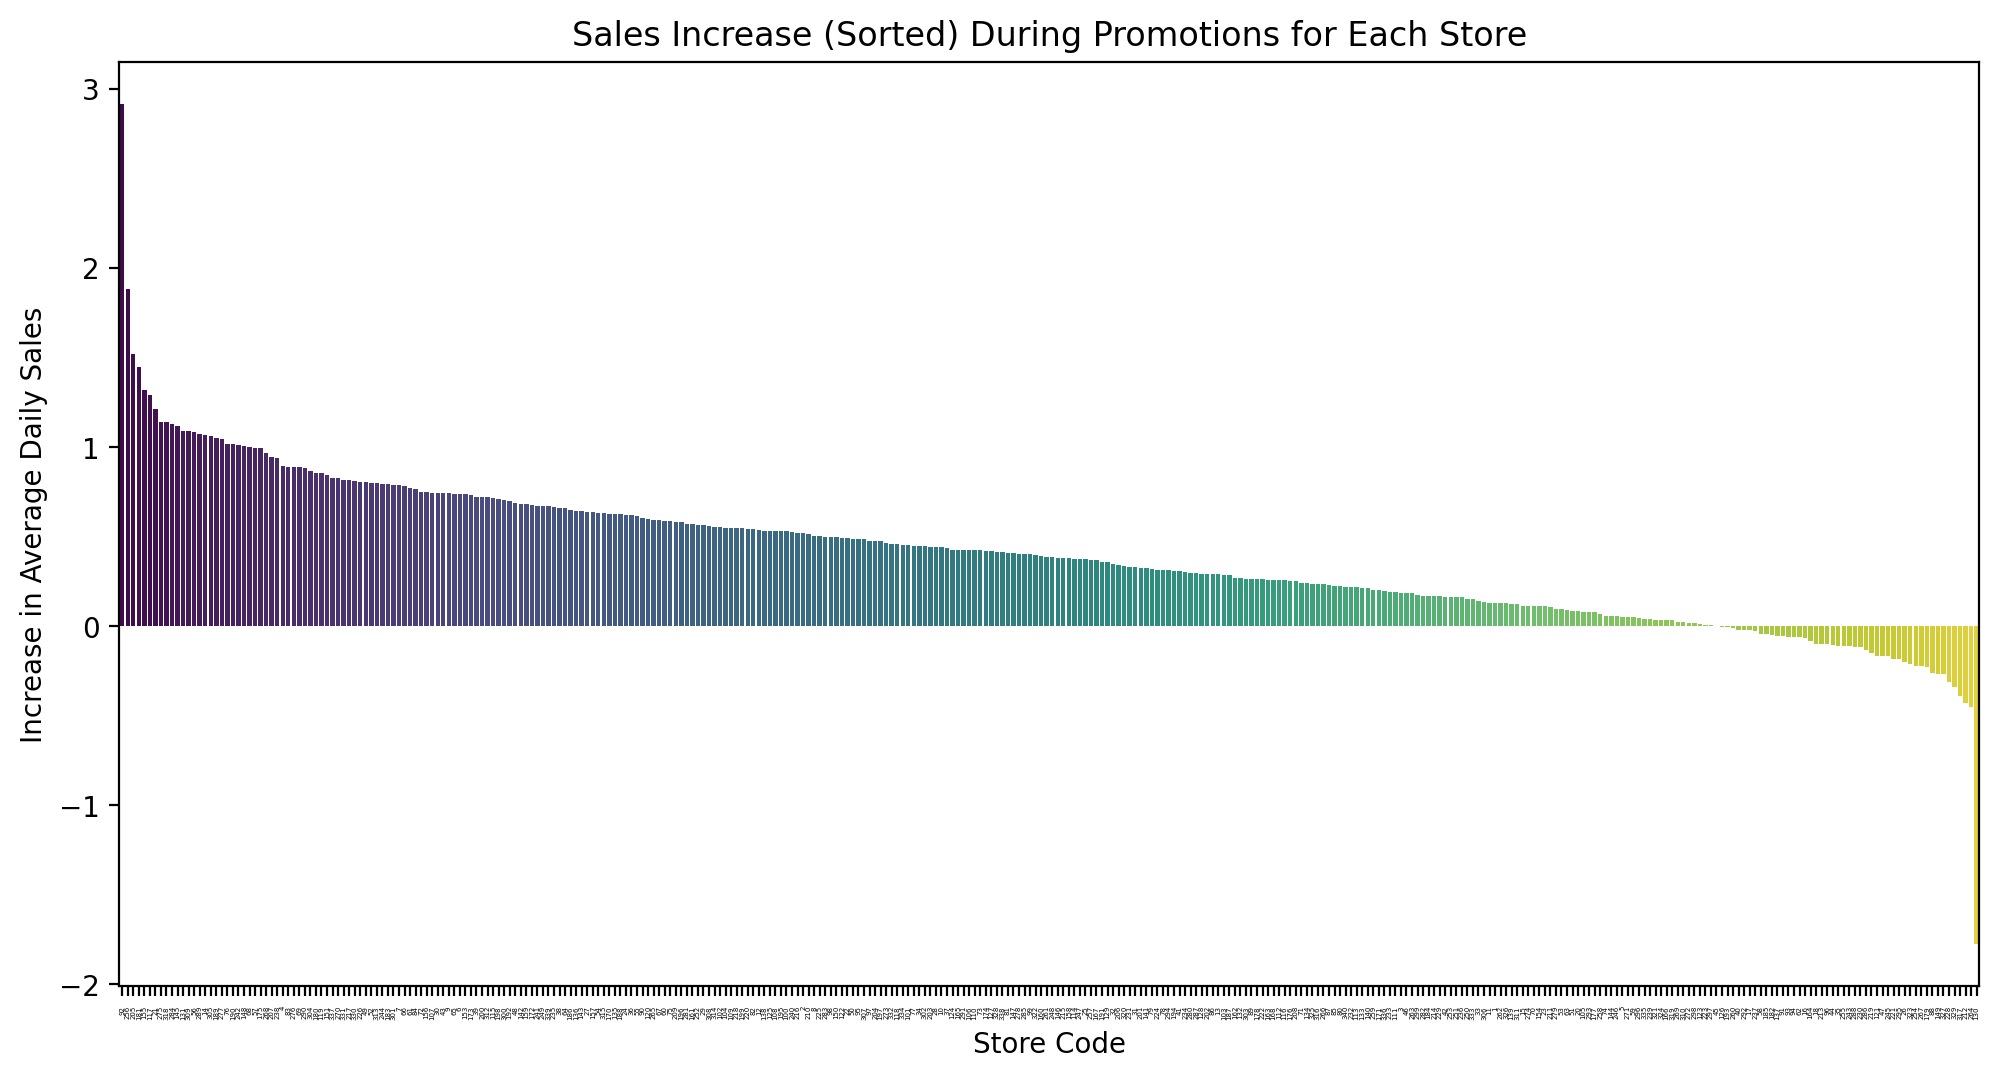

In [ ]:
order = sales_comparison_store_sorted['StoreCode'].values
# Plot the sales increase after promotion for each product across all stores in ascending order.
plt.figure(figsize=(12,6),dpi=200)

plt.ylabel('Increase in Average Daily Sales')
plt.xlabel('Store Code')
plt.title('Sales Increase (Sorted) During Promotions for Each Store')
plt.xticks(fontsize=2.5, rotation=90)
sns.barplot(data=sales_comparison_store_sorted, x='StoreCode',y='SalesIncrease', order=order, palette='viridis');

In [ ]:
sales_comparison_store_sorted_cat = sales_comparison_store_sorted.merge(average_weekly_sales_store[['StoreCode', 'Category']], on='StoreCode', how='left')

In [ ]:
sales_comparison_store_sorted_cat.head()

,StoreCode,NonPromotionAvgSales,PromotionAvgSales,SalesIncrease,Category
0,92,1.846047,4.760684,2.914637,Slow
1,256,3.116119,4.996736,1.880617,Fast
2,205,3.861573,5.380863,1.519290,Medium
3,181,2.711883,4.157635,1.445752,Medium
4,155,2.785772,4.104735,1.318962,Slow


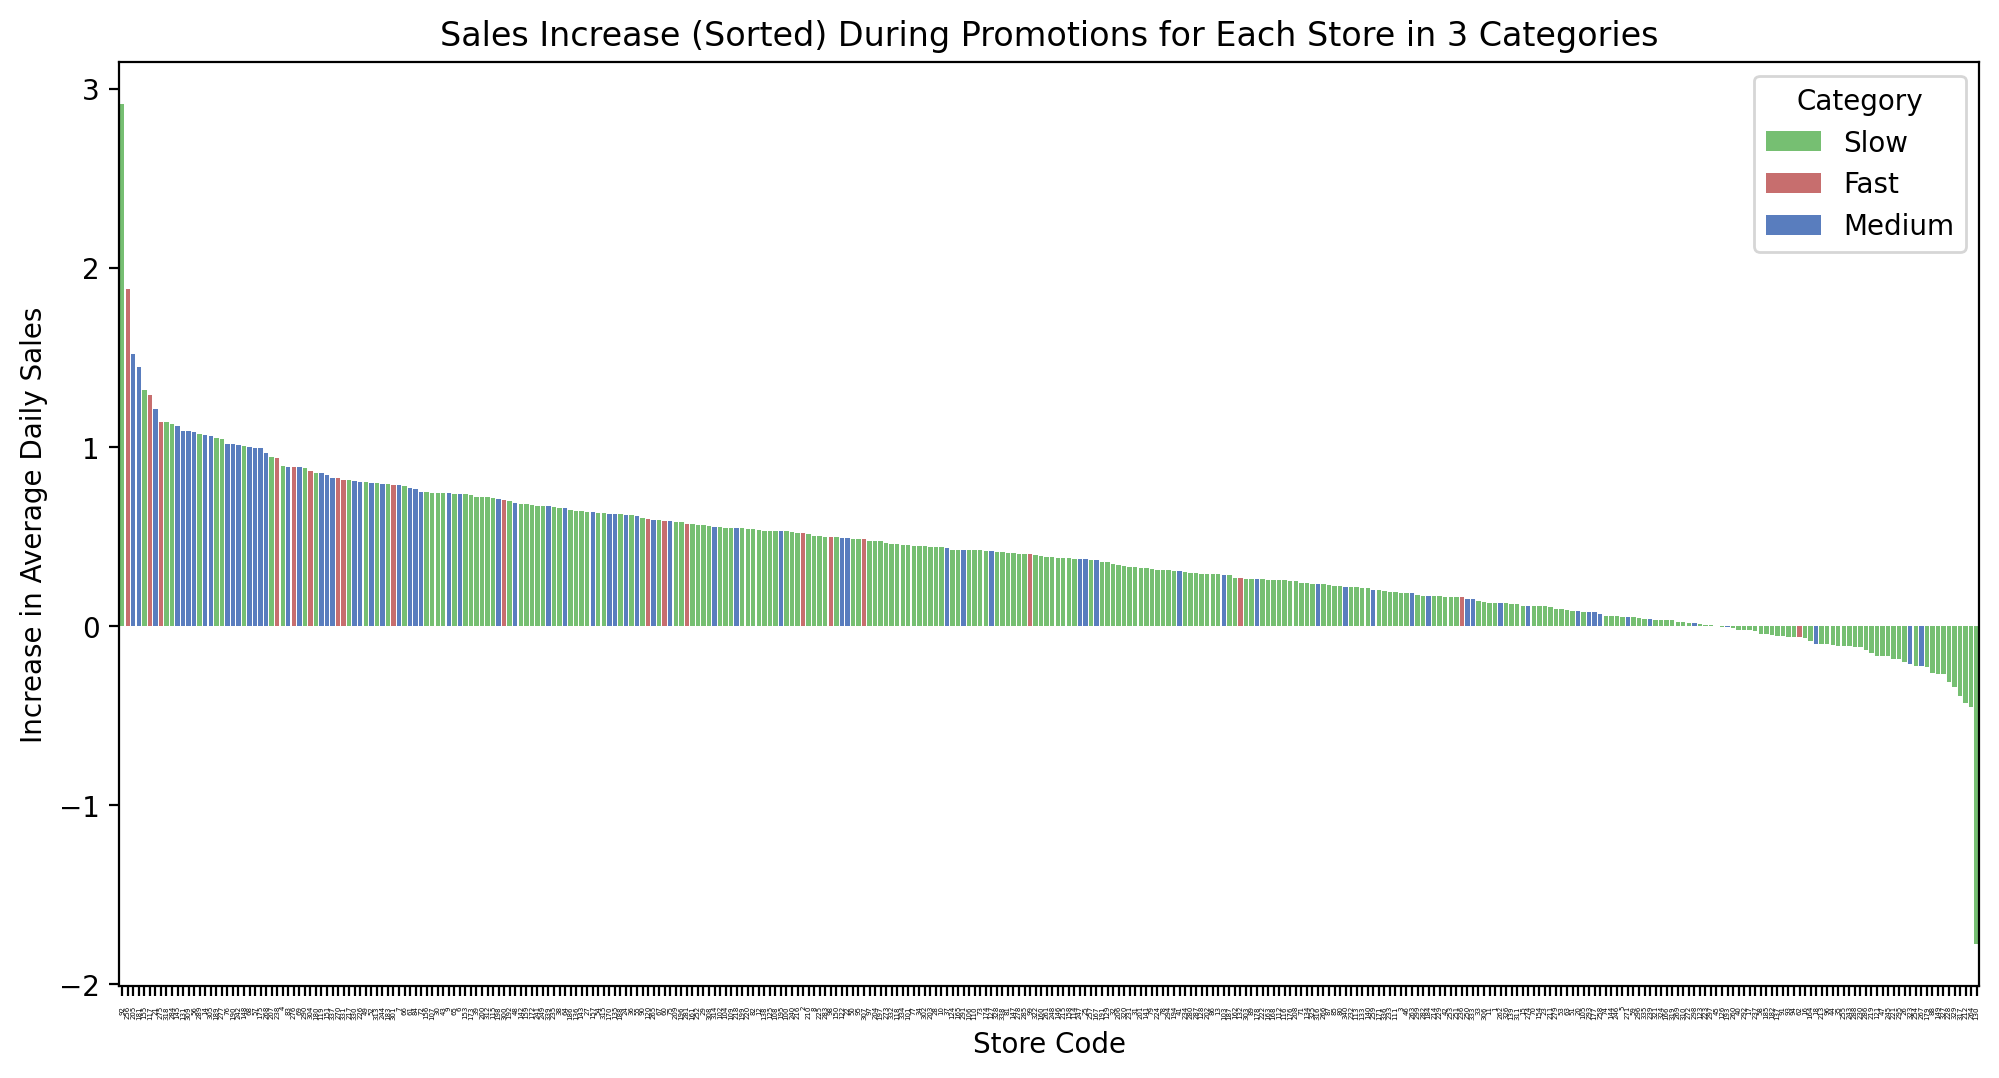

In [ ]:
order = sales_comparison_store_sorted_cat['StoreCode'].values
# Plot the sales increase after promotion for each product across all stores in ascending order.
plt.figure(figsize=(12,6),dpi=200)

plt.ylabel('Increase in Average Daily Sales')
plt.xlabel('Store Code')
plt.title('Sales Increase (Sorted) During Promotions for Each Store in 3 Categories')
plt.xticks(fontsize=2.5, rotation=90)
muted    = dict(Slow="#6ACC65", Medium="#4878CF", Fast="#D65F5F")
sns.barplot(data=sales_comparison_store_sorted_cat, x='StoreCode',y='SalesIncrease', hue='Category', order=order, palette=muted);

---

### ( e ) What is the biggest effect explaining sales change during promotions?



What could affect the sales change during promotions?
*   promotion duration? (almost all promotions last 7 days)
*   season,month of the year? (each promotion is in a different month)
*day of the week
*   product category?
*   store category?

Given the data provided, we can start by analyzing the impact of the store and product type. We'll use a regression model to quantify the impact of these factors on sales during promotion periods. Due to lack of data, it's hard to interpret the effects of time period and duration of a promotion on sales.

As you can see below, product category is the biggest effect explaining sales change (increase) during promotions.

In [ ]:
# Merge with sales data
complete_sales = complete_df.merge(df, on=['Date', 'ProductCode', 'StoreCode'], how='left')
# Assume that if a store-item combination has no observation in a certain day, there is no sales for that item at that store at that day.
# Fill missing values with 0
complete_sales['SalesQuantity'].fillna(0, inplace=True)
# Drop IsPromotion column
complete_sales.drop('IsPromotion', axis=1, inplace=True)

In [ ]:
average_weekly_sales_store = pd.read_csv('/content/store_categories.csv')
average_weekly_sales_product = pd.read_csv('/content/product_categories.csv')

In [ ]:
# After evaluating the model, model needs new features
complete_sales['DayOfWeek'] = complete_sales['Date'].dt.dayofweek

In [ ]:
# Add new feature for the model to consider previous day sales
complete_sales['DailySalesIncrease'] = complete_sales.groupby(['StoreCode', 'ProductCode'])['SalesQuantity'].shift(1).fillna(0)

In [ ]:
# Add a new IsPromotion column and initialize to False
complete_sales['IsPromotion'] = 0

In [ ]:
# Check the date if it is in a promotion period
for start, end in promotion_periods:
    mask = (complete_sales['Date'] >= start) & (complete_sales['Date'] <= end)
    complete_sales.loc[mask, 'IsPromotion'] = 1

In [ ]:
complete_sales.head()

,ProductCode,StoreCode,Date,SalesQuantity,DayOfWeek,DailySalesIncrease,IsPromotion
0,9,8,2015-01-01,-1.0,3,0.0,0
1,9,8,2015-01-02,0.0,4,-1.0,0
2,9,8,2015-01-03,0.0,5,0.0,0
3,9,8,2015-01-04,0.0,6,0.0,0
4,9,8,2015-01-05,0.0,0,0.0,0


In [ ]:
complete_sales_data = complete_sales.merge(average_weekly_sales_store[['StoreCode', 'Category']], on='StoreCode', how='left')

In [ ]:
complete_sales_data = complete_sales_data.merge(average_weekly_sales_product[['ProductCode', 'Category']], on='ProductCode', how='left')

In [ ]:
complete_sales_data.rename(columns={'Category_x': 'ProductCategory', 'Category_y': 'StoreCategory'}, inplace=True)

In [ ]:
complete_sales_data = pd.get_dummies(complete_sales_data, columns=['ProductCategory', 'StoreCategory'], dtype='int', drop_first=False)

In [ ]:
#complete_sales_data = complete_sales_data.replace({True: 1, False: 0})

In [ ]:
complete_sales_data.head(5)

,ProductCode,StoreCode,Date,SalesQuantity,DayOfWeek,DailySalesIncrease,IsPromotion,ProductCategory_Fast,ProductCategory_Medium,ProductCategory_Slow,StoreCategory_Fast,StoreCategory_Medium,StoreCategory_Slow
0,9,8,2015-01-01,-1.0,3,0.0,0,0,0,1,0,0,1
1,9,8,2015-01-02,0.0,4,-1.0,0,0,0,1,0,0,1
2,9,8,2015-01-03,0.0,5,0.0,0,0,0,1,0,0,1
3,9,8,2015-01-04,0.0,6,0.0,0,0,0,1,0,0,1
4,9,8,2015-01-05,0.0,0,0.0,0,0,0,1,0,0,1


In [ ]:
sns.heatmap(complete_sales_data.drop(['Date','StoreCode','ProductCode','SalesQuantity'],axis=1).corr(),cmap="viridis")

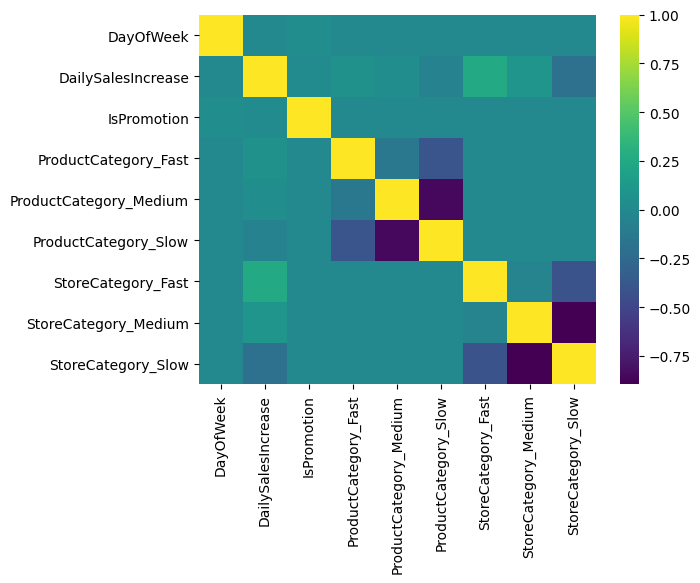

In [ ]:
complete_sales_data.drop(['Date','StoreCode','ProductCode','SalesQuantity'],axis=1).corr().sort_values('SalesIncrease',ascending=False)

#### Linear Regression

In [ ]:
#Preparing the regression data
X= sales_data[['ProductCategory_Fast',	'ProductCategory_Medium',	'ProductCategory_Slow',	'StoreCategory_Fast',	'StoreCategory_Medium',	'StoreCategory_Slow']]
y= sales_data['SalesIncrease']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Build the regression model
model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

In [ ]:
# Make predictions and evaluate the model
y_pred = model.predict(X_scaled)

In [ ]:
#Mean Squared Error:
mean_squared_error(y, y_pred)

6.717806024382888

An R-squared value of 0.015 indicates that 1.5% of the variance in sales increases can be explained by the model, which is a bad fit. There must be other features affecting the sales increase.

In [ ]:
#R-squared:
r2_score(y, y_pred)

0.015606317575564965

In [ ]:
# Calculate the coefficients to determine which factors have the biggest impact on sales changes during promotions
coefs = pd.Series(index=X.columns,data=model.coef_)

In [ ]:
coefs = coefs.sort_values()

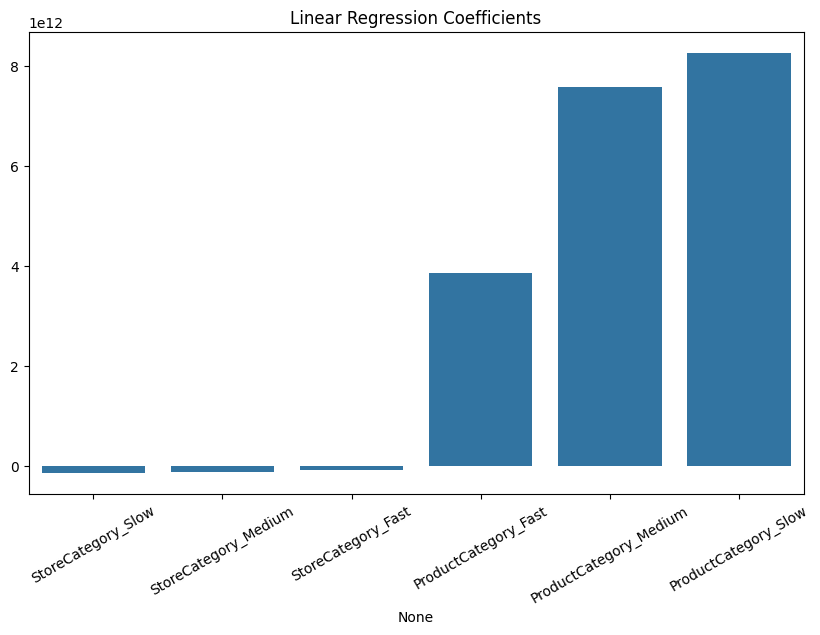

In [ ]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=30)
plt.title('Linear Regression Coefficients')
sns.barplot(x=coefs.index,y=coefs.values);

### ( f-g ) Is there any significant difference between promotion impacts of the Fast versus Slow in items and stores?



A t-test is an inferential statistic used to determine if there is a statistically significant difference between the means of two variables.

In [ ]:
# Calculate the T-test for the means of two independent samples of scores.
from scipy.stats import ttest_ind

In [ ]:
fast_products = pd.DataFrame()
slow_products = pd.DataFrame()

In [ ]:
# Separate the data into fast and slow items
fast_products['SalesIncrease'] = sales_data[sales_data['ProductCategory_Fast'] == 1]['SalesIncrease']
slow_products['SalesIncrease'] = sales_data[sales_data['ProductCategory_Slow'] == 1]['SalesIncrease']

In [ ]:
# Perform a t-test to compare the sales increase between fast and slow items.
t_stat, p_value = ttest_ind(fast_products, slow_products)

In [ ]:
# T-statistic
t_stat[0]

23.23176850487595

In [ ]:
# P-value
p_value[0]

7.924196790205922e-119

In [ ]:
# Determine if the difference is significant
alpha = 0.05
if p_value < alpha:
    print("Therefore, it is safe to reject the null hypothesis that there is no difference between means. There is a significant difference between the promotion impacts of fast and slow items.")
else:
    print("There is no significant difference between the promotion impacts of fast and slow items.")

Therefore, it is safe to reject the null hypothesis that there is no difference between means. There is a significant difference between the promotion impacts of fast and slow items.


In [ ]:
fast_products['Category']='Fast'
slow_products['Category']='Slow'

In [ ]:
fast_slow_products = pd.concat([fast_products, slow_products], axis=0)

<ipython-input-130-bdca33c3b776>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y='SalesIncrease', data=fast_slow_products[fast_slow_products['Category'].isin(['Fast', 'Slow'])], palette='viridis', inner=None)


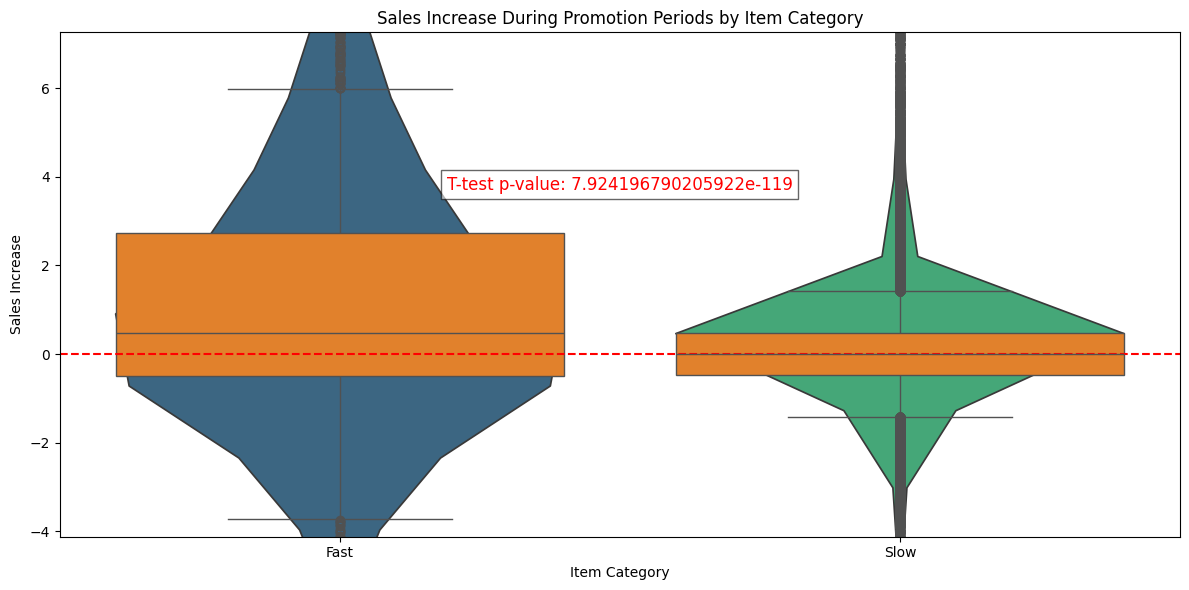

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Category', y='SalesIncrease', data=fast_slow_products[fast_slow_products['Category'].isin(['Fast', 'Slow'])], palette='viridis', inner=None)
sns.boxplot(x='Category', y='SalesIncrease', data=fast_slow_products, whis=1.0);
plt.title('Sales Increase During Promotion Periods by Item Category')
plt.xlabel('Item Category')
plt.ylabel('Sales Increase')
plt.ylim(fast_slow_products['SalesIncrease'].quantile(0.01), fast_slow_products['SalesIncrease'].quantile(0.99))
plt.axhline(0, color='red', linestyle='--')
plt.text(0.5, fast_slow_products['SalesIncrease'].quantile(0.97), f'T-test p-value: {p_value[0]}', horizontalalignment='center', verticalalignment='center', color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.6))
plt.tight_layout()
plt.show()

---

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
fast_stores = pd.DataFrame()
slow_stores = pd.DataFrame()

In [ ]:
# Separate the data into fast and slow stores
fast_stores['SalesIncrease'] = sales_data[sales_data['StoreCategory_Fast'] == 1]['SalesIncrease']
slow_stores['SalesIncrease'] = sales_data[sales_data['StoreCategory_Slow'] == 1]['SalesIncrease']

In [ ]:
# Perform a t-test to compare the sales increase between fast and slow stores
t_stat, p_value = ttest_ind(fast_stores, slow_stores)

In [ ]:
# T-statistic
t_stat[0]

5.0745219429921145

In [ ]:
# P-value
p_value[0]

3.8989123262126047e-07

In [ ]:
# Determine if the difference is significant
alpha = 0.05
if p_value < alpha:
    print("Therefore, it is safe to reject the null hypothesis that there is no difference between means. There is a significant difference between the promotion impacts of fast and slow stores.")
else:
    print("There is no significant difference between the promotion impacts of fast and slow stores.")

Therefore, it is safe to reject the null hypothesis that there is no difference between means. There is a significant difference between the promotion impacts of fast and slow stores.


In [ ]:
fast_stores['Category']='Fast'
slow_stores['Category']='Slow'

In [ ]:
fast_slow_stores = pd.concat([fast_stores, slow_stores], axis=0)

<ipython-input-140-6c8b2e6222a7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y='SalesIncrease', data=fast_slow_stores[fast_slow_stores['Category'].isin(['Fast', 'Slow'])], palette='viridis', inner=None)


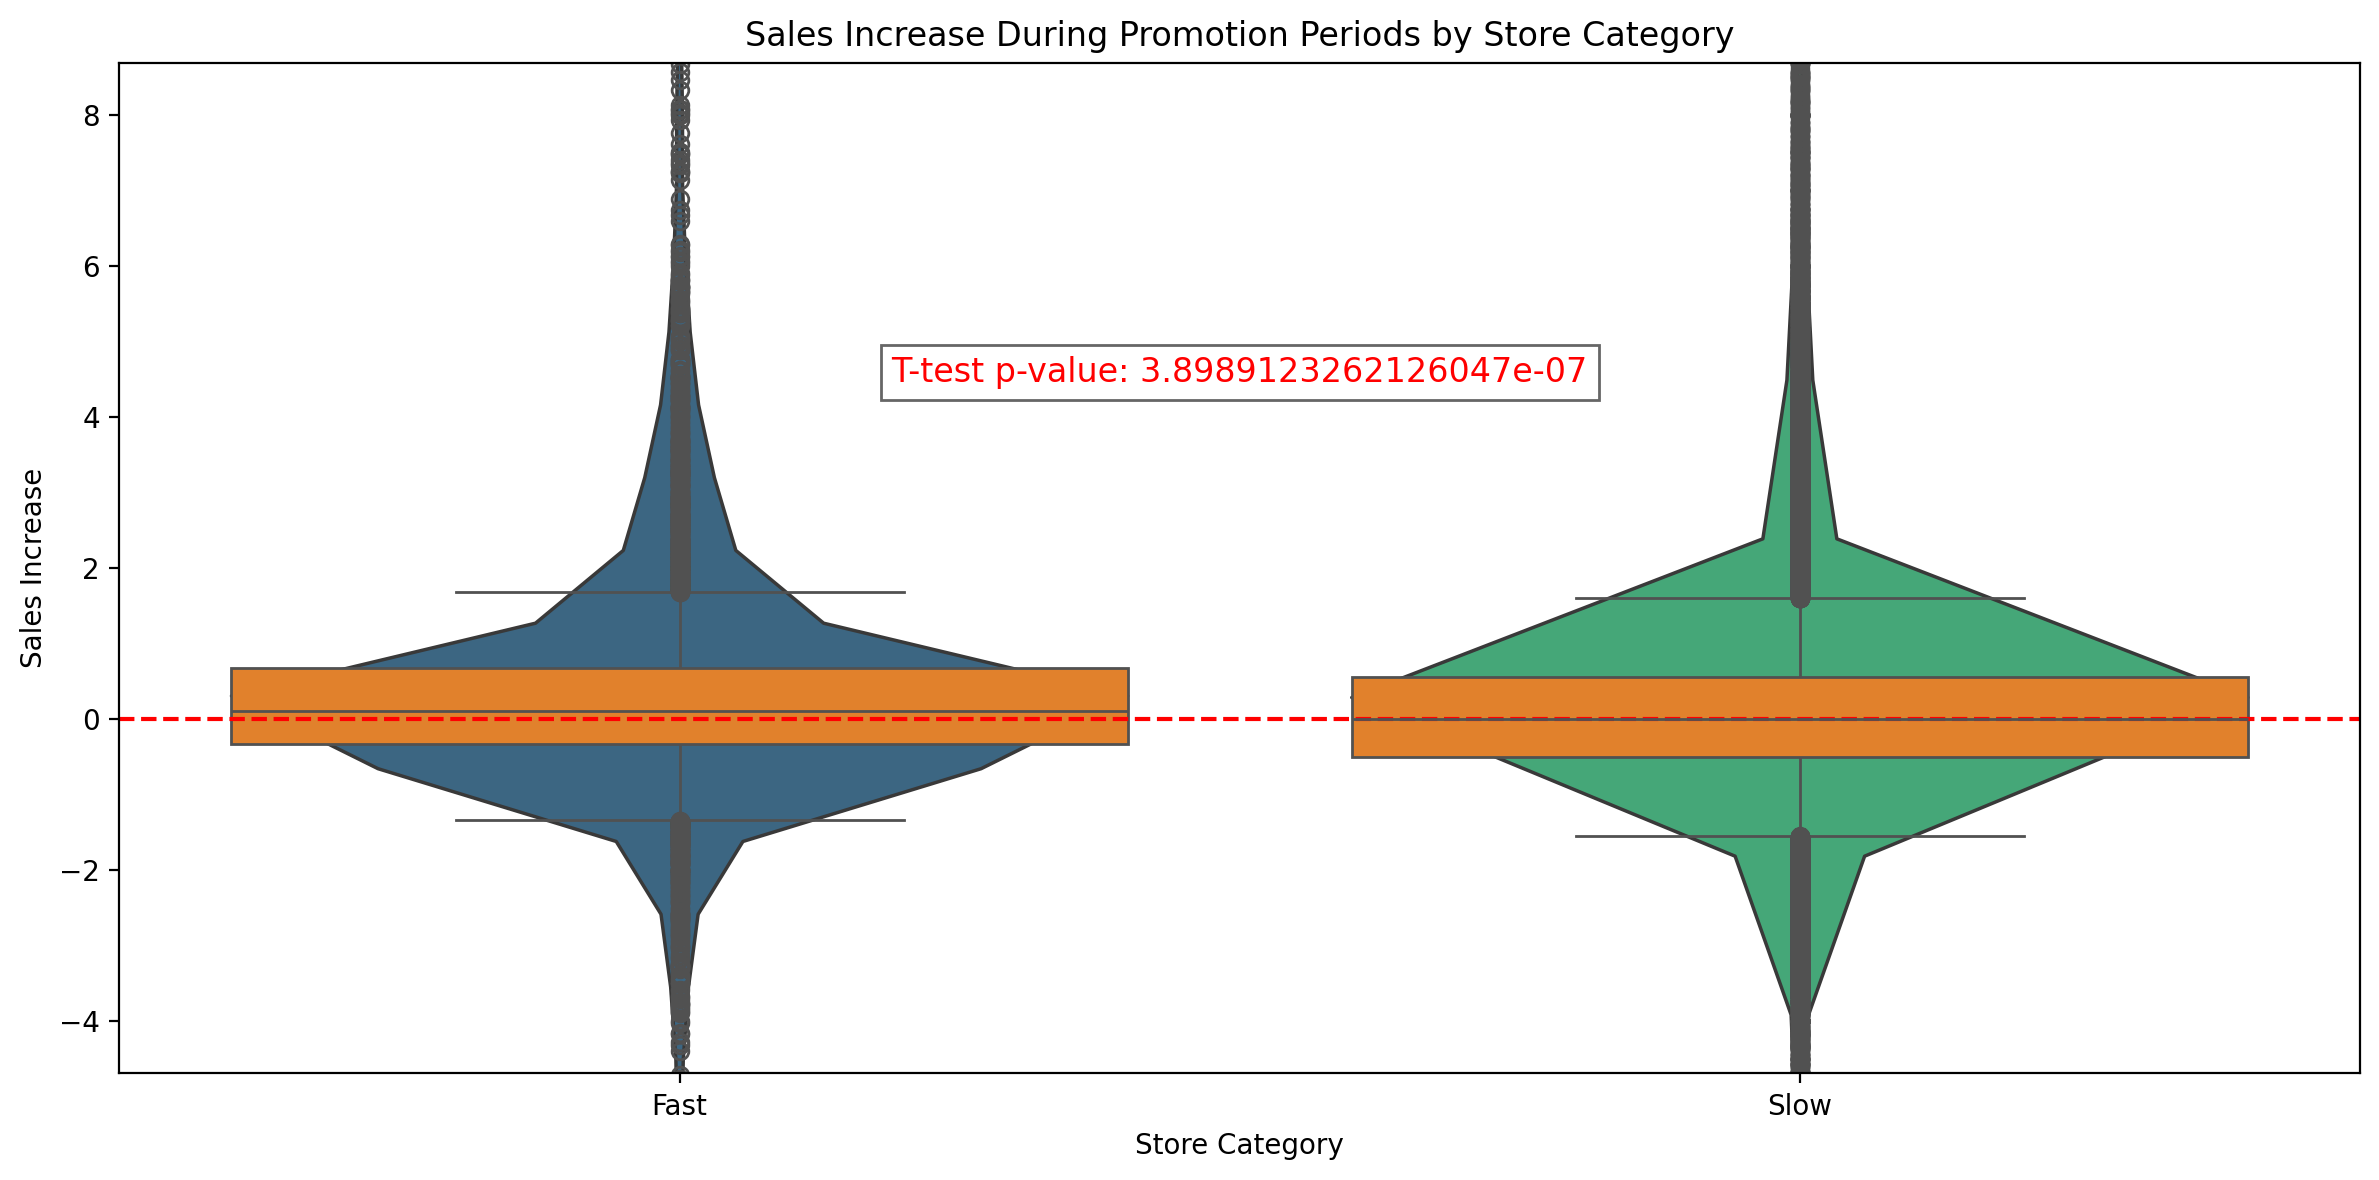

In [ ]:
plt.figure(figsize=(12,6),dpi=200)
sns.violinplot(x='Category', y='SalesIncrease', data=fast_slow_stores[fast_slow_stores['Category'].isin(['Fast', 'Slow'])], palette='viridis', inner=None)
sns.boxplot(x='Category', y='SalesIncrease', data=fast_slow_stores, whis=1.0);
plt.title('Sales Increase During Promotion Periods by Store Category')
plt.xlabel('Store Category')
plt.ylabel('Sales Increase')
plt.ylim(fast_slow_stores['SalesIncrease'].quantile(0.01), fast_slow_stores['SalesIncrease'].quantile(0.99))
plt.axhline(0, color='red', linestyle='--')
plt.text(0.5, fast_slow_stores['SalesIncrease'].quantile(0.97), f'T-test p-value: {p_value[0]}', horizontalalignment='center', verticalalignment='center', color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.6))
plt.tight_layout()
plt.show()

---

#Part 4: Model Evaluation

In [ ]:
# Load the new data
new_data = pd.read_csv('/content/assignment4.1b.csv')

In [ ]:
# Convert date columns to datetime
new_data['Date'] = pd.to_datetime(new_data['Date'], errors='coerce')

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028121 entries, 0 to 1028120
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Date           1028121 non-null  datetime64[ns]
 1   StoreCode      1028121 non-null  int64         
 2   ProductCode    1028121 non-null  int64         
 3   SalesQuantity  1028121 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 MB


In [ ]:
# Add a new IsPromotion column and initialize to False
new_data['IsPromotion'] = False

In [ ]:
# Check the date if it is in a promotion period
for start, end in promotion_periods:
    mask = (new_data['Date'] >= start) & (new_data['Date'] <= end)
    new_data.loc[mask, 'IsPromotion'] = True

In [ ]:
# Determine the sales during non-promotion periods
new_non_promotion_sales = new_data[new_data['IsPromotion'] == False]

In [ ]:
# Determine the sales during promotion periods
new_promotion_sales = new_data[new_data['IsPromotion'] == True]

In [ ]:
new_non_promotion_sales = new_non_promotion_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()
new_promotion_sales = new_promotion_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()
new_sales_comparison = pd.merge(new_non_promotion_sales, new_promotion_sales, on=['ProductCode', 'StoreCode'], suffixes=('_NonPromotion', '_Promotion'))
new_sales_comparison['SalesIncrease'] = new_sales_comparison['SalesQuantity_Promotion'] - new_sales_comparison['SalesQuantity_NonPromotion']
new_sales_data = new_sales_comparison.merge(average_weekly_sales_product[['ProductCode', 'Category']], on='ProductCode', how='left')
new_sales_data = new_sales_data.merge(average_weekly_sales_store[['StoreCode', 'Category']], on='StoreCode', how='left')
new_sales_data.rename(columns={'Category_x': 'ProductCategory', 'Category_y': 'StoreCategory'}, inplace=True)
new_sales_data = pd.get_dummies(new_sales_data, columns=['ProductCategory', 'StoreCategory'], drop_first=False)
new_sales_data = new_sales_data.replace({True: 1, False: 0})


In [ ]:
new_sales_data.head()

,ProductCode,StoreCode,SalesQuantity_NonPromotion,SalesQuantity_Promotion,SalesIncrease,ProductCategory_Fast,ProductCategory_Medium,ProductCategory_Slow,StoreCategory_Fast,StoreCategory_Medium,StoreCategory_Slow
0,1,1,1.000000,2.0,1.000000,0,0,1,0,0,1
1,1,2,2.100000,0.5,-1.600000,0,0,1,1,0,0
2,1,5,3.600000,0.0,-3.600000,0,0,1,0,0,1
3,1,7,1.533333,1.0,-0.533333,0,0,1,0,1,0
4,1,13,0.400000,4.0,3.600000,0,0,1,0,0,1


In [ ]:
X_test = new_sales_data[['ProductCategory_Fast',	'ProductCategory_Medium',	'ProductCategory_Slow',	'StoreCategory_Fast',	'StoreCategory_Medium',	'StoreCategory_Slow']]
y_test = new_sales_data['SalesIncrease']

In [ ]:
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)

###What measure would you use for goodness of fit?


MSE measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

In [ ]:
#Mean Squared Error:
mean_squared_error(y_test, y_pred)

2.1511579295970074e+23

R² provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model.

In [ ]:
#R-squared:
r2_score(y_test, y_pred)

-1.9242156194778187e+22

###How good is your model developed in step 1? What are the main problem points causing bad fits?


Both MSE and R² values indicates that this model is bad. There must be other features affecting the sales increase. After doing a feature engineering, one can try enhance the predictive power of your model and address the issues causing poor fits (Model Tuning). Cross Validation, Regularization, Handling Outliers etc. are the methods to enhance the model.

###What would you change in step 1?

We need to consider the sales quantity within the week to predict the sales increase for incmoing promotion instead assuming that sales quantity doesn't change through time, it is a mistake.